# Library

In [1]:
import pandas as pd
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import time
from numpy import concatenate
import numpy as np

import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from tensorflow.python.keras.layers import Dense, GRU, Dropout
from tensorflow.python.keras import Sequential
from math import sqrt;
import tensorflow as tf

# Preprocessing

## Import data

In [23]:
# import data
url = "https://drive.google.com/file/d/1_LBzbPCrkDpksT37LZoIRs8NyeOocCyr/view?usp=share_link"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url, parse_dates = True,index_col=0)
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-11-01 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-11-01 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-11-01 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-11-01 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
2016-11-01 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [24]:
df.shape

(19735, 28)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-11-01 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9         

In [26]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.412580,755.522602,79.750418,4.039752,38.330834,3.760995,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.318464,7.399441,14.901088,2.451221,11.794719,4.195248,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.670000,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.400000,760.933333,91.666667,5.500000,40.000000,6.570000,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [27]:
# Jumlah missing value
df.isnull().sum()

Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

<AxesSubplot:xlabel='date'>

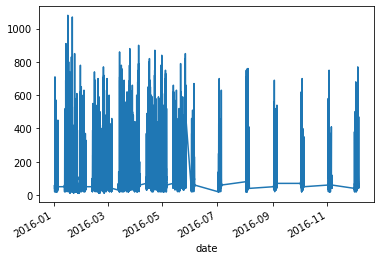

In [28]:
df['Appliances'].plot()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Appliances', ylabel='Density'>

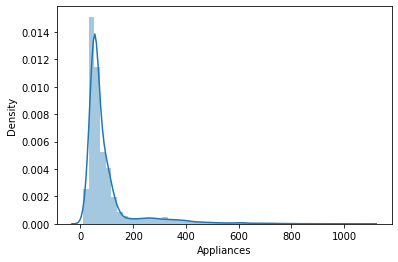

In [29]:
sns.distplot(df['Appliances'])

In [30]:
# Correlation matrix
df.corr()['Appliances']

Appliances     1.000000
lights         0.197278
T1             0.055447
RH_1           0.086031
T2             0.120073
RH_2          -0.060465
T3             0.085060
RH_3           0.036292
T4             0.040281
RH_4           0.016965
T5             0.019760
RH_5           0.006955
T6             0.117638
RH_6          -0.083178
T7             0.025801
RH_7          -0.055642
T8             0.039572
RH_8          -0.094039
T9             0.010010
RH_9          -0.051462
T_out          0.099155
Press_mm_hg   -0.034885
RH_out        -0.152282
Windspeed      0.087122
Visibility     0.000230
Tdewpoint      0.015357
rv1           -0.011145
rv2           -0.011145
Name: Appliances, dtype: float64

Feature Extraction (Skenario Atribut)

In [31]:
# Data 1
# All
# df_new = df

# tanpa minus
# df_new = df.drop(df.columns[[5, 13, 15, 17, 19, 21, 22, 26, 27]], axis=1)

# 5 teratas
# df_new = df.drop(df.columns[[2, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27]], axis=1)

# 3 teratas
# df_new = df.drop(df.columns[[2, 3, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]], axis=1)

# 1 teratas
df_new = df.drop(df.columns[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]], axis=1)

In [32]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-11-01 17:00:00 to 2016-05-27 18:00:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Appliances  19735 non-null  int64
dtypes: int64(1)
memory usage: 308.4 KB


In [33]:
values = df_new.values

In [34]:
values.shape

(19735, 1)

## Normalisasi

In [35]:
# MinMax
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [14]:
# Z-score
# scaled = stats.zscore(values, axis = 0)

#Z-Score
scaler = StandardScaler()
scaled = scaler.fit_transform(values)

## Convert to Time Series

In [36]:
#covert to time-series
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [37]:
reframed = series_to_supervised(scaled, 1, 1)
reframed.head()

,var1(t-1),var1(t)
1,0.046729,0.046729
2,0.046729,0.037383
3,0.037383,0.037383
4,0.037383,0.046729
5,0.046729,0.037383


In [38]:
reframed.shape

(19734, 2)

In [39]:
# Data 1

# All
# reframed.drop(reframed.columns[[x for x in range(29, 56)]], axis=1, inplace=True)

# no minus
# reframed.drop(reframed.columns[[x for x in range(20, 38)]], axis=1, inplace=True)

# Top 5
# reframed.drop(reframed.columns[[x for x in range(7, 12)]], axis=1, inplace=True)

# Top 3
# reframed.drop(reframed.columns[[x for x in range(5, 8)]], axis=1, inplace=True)

reframed.head()

,var1(t-1),var1(t)
1,0.046729,0.046729
2,0.046729,0.037383
3,0.037383,0.037383
4,0.037383,0.046729
5,0.046729,0.037383


## Split data

In [ ]:
#split into train and test sets
values = reframed.values
# n_train = round(values.shape[0])

train = values[:, :]
test = values[:, :]

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshap input menjadi 3D ([)samples, timesteps, features)
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

# Model Building

### Random Search

In [ ]:
#design network GRU
model = Sequential()
model.add(GRU(11, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'sigmoid'))
model.add(Dropout(0.2))

model.add(GRU(units = 11, return_sequences = True, activation='sigmoid'))
model.add(Dropout(0.2))

model.add(GRU(units = 11, return_sequences = True, activation='sigmoid'))
model.add(Dropout(0.2))

model.add(GRU(units = 11, return_sequences = True, activation='sigmoid'))
model.add(Dropout(0.2))

model.add(GRU(units = 11, return_sequences = True, activation='sigmoid'))
model.add(Dropout(0.2))

model.add(GRU(units = 11, return_sequences = True, activation='sigmoid'))
model.add(Dropout(0.2))

model.add(GRU(units = 11, return_sequences = True, activation='sigmoid'))
model.add(Dropout(0.2))

model.add(GRU(units = 11, return_sequences = True, activation='sigmoid'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mse', optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 1, 11)             594       
_________________________________________________________________
dropout (Dropout)            (None, 1, 11)             0         
_________________________________________________________________
gru_1 (GRU)                  (None, 1, 11)             759       
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 11)             0         
_________________________________________________________________
gru_2 (GRU)                  (None, 1, 11)             759       
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 11)             0         
_________________________________________________________________
gru_3 (GRU)                  (None, 1, 11)             7

In [ ]:
#fit network
start = time.time()
history = model.fit(train_X, train_y, epochs=66, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
end = time.time()
print('Processing Time {} seconds.'.format(end-start))

Epoch 1/66
198/198 [==============================] - 26s 34ms/step - loss: 1.2581 - val_loss: 1.0969
Epoch 2/66
198/198 [==============================] - 4s 18ms/step - loss: 1.0521 - val_loss: 1.0177
Epoch 3/66
198/198 [==============================] - 4s 19ms/step - loss: 1.0225 - val_loss: 1.0101
Epoch 4/66
198/198 [==============================] - 4s 22ms/step - loss: 1.0161 - val_loss: 1.0067
Epoch 5/66
198/198 [==============================] - 3s 17ms/step - loss: 1.0103 - val_loss: 1.0049
Epoch 6/66
198/198 [==============================] - 3s 17ms/step - loss: 1.0085 - val_loss: 1.0037
Epoch 7/66
198/198 [==============================] - 5s 23ms/step - loss: 1.0073 - val_loss: 1.0030
Epoch 8/66
198/198 [==============================] - 4s 18ms/step - loss: 1.0065 - val_loss: 1.0024
Epoch 9/66
198/198 [==============================] - 3s 17ms/step - loss: 1.0058 - val_loss: 1.0019
Epoch 10/66
198/198 [==============================] - 4s 22ms/step - loss: 1.0043 - val_l

### Grid Search

In [ ]:
#design network GRU
model = Sequential()
model.add(GRU(32, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'sigmoid'))
model.add(Dropout(0.2))

model.add(GRU(units = 32, return_sequences = True, activation='sigmoid'))
model.add(Dropout(0.2))

model.add(GRU(units = 32, return_sequences = True, activation='sigmoid'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_57 (LSTM)               (None, 1, 32)             4992      
_________________________________________________________________
dropout_57 (Dropout)         (None, 1, 32)             0         
_________________________________________________________________
lstm_58 (LSTM)               (None, 1, 32)             8320      
_________________________________________________________________
dropout_58 (Dropout)         (None, 1, 32)             0         
_________________________________________________________________
lstm_59 (LSTM)               (None, 1, 32)             8320      
_________________________________________________________________
dropout_59 (Dropout)         (None, 1, 32)             0         
_________________________________________________________________
dense_19 (Dense)             (None, 1, 1)            

In [ ]:
#fit network
start = time.time()
history = model.fit(train_X, train_y, epochs=50, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
end = time.time()
print('Processing Time {} seconds.'.format(end-start))

Epoch 1/50
198/198 [==============================] - 8s 11ms/step - loss: 0.0209 - val_loss: 0.0092
Epoch 2/50
198/198 [==============================] - 2s 11ms/step - loss: 0.0099 - val_loss: 0.0092
Epoch 3/50
198/198 [==============================] - 2s 8ms/step - loss: 0.0098 - val_loss: 0.0092
Epoch 4/50
198/198 [==============================] - 2s 8ms/step - loss: 0.0098 - val_loss: 0.0091
Epoch 5/50
198/198 [==============================] - 2s 8ms/step - loss: 0.0096 - val_loss: 0.0091
Epoch 6/50
198/198 [==============================] - 2s 8ms/step - loss: 0.0096 - val_loss: 0.0091
Epoch 7/50
198/198 [==============================] - 2s 8ms/step - loss: 0.0096 - val_loss: 0.0091
Epoch 8/50
198/198 [==============================] - 2s 8ms/step - loss: 0.0096 - val_loss: 0.0091
Epoch 9/50
198/198 [==============================] - 2s 11ms/step - loss: 0.0095 - val_loss: 0.0090
Epoch 10/50
198/198 [==============================] - 2s 8ms/step - loss: 0.0095 - val_loss: 0.0

# Evaluasi

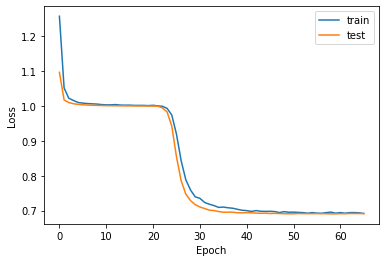

In [ ]:
#plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.xlabel('Epoch')
pyplot.ylabel('Loss')
pyplot.legend()
pyplot.show()

In [ ]:
#membuat prediksi training
xhat = model.predict(train_X)
xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

#invert scaling untuk peramalan
inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
inv_xhat = scaler.inverse_transform(inv_xhat)
inv_xhat = inv_xhat[:,0]

#invert scaling untuk aktual
train_y = train_y.reshape((len(train_y), 1))
inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
inv_x = scaler.inverse_transform(inv_x)
inv_x = inv_x[:,0]

#================================================================#

#membuat prediksi testing
yhat = model.predict(test_X)
yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

#invert scaling untuk peramalan
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

#invert scaling untuk aktual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [ ]:
# calculate RMSE
np.seterr(divide='ignore', invalid='ignore')
def mean_absolute_percentage_error(yhat, test_y):
      yhat, test_y = np.array(yhat), np.array(test_y)
      return np.mean(np.abs((yhat, test_y) / test_y))

print('==============minmax===================')
print(f'MAPE test is : %.5f' % (mean_absolute_percentage_error(test_y, yhat)))
print(f'MAPE test invert is : %.5f' % (mean_absolute_percentage_error(inv_y, inv_yhat)))

print('==============zscore===================')
print(f'MAPE test is : %.5f' % (mean_absolute_percentage_error(yhat, test_y)))
print(f'MAPE test invert is : %.5f' % (mean_absolute_percentage_error(inv_yhat, inv_y)))

print('=======================================')
rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
print(f'RMSE Testing is : %.3f' % rmsetest)
rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

print(f'R2 test is : %.5f' % r2_score(test_y, yhat))
print(f'R2 test invert is : %.5f' % r2_score(inv_y, inv_yhat))

==============minmax===================
MAPE test is : 2492.454733152778
MAPE test invert is : 0.9079214286742503
==============zscore===================
MAPE test is : 0.7468860416395285
MAPE test invert is : 1.3210985923945775
RMSE Testing is : 0.831
RMSE Testing invert is : 85.234
R2 test is : 0.3088578059107012
R2 test invert is : 0.30885780591070133


Actual : [[-0.36767572]
 [-0.46521548]
 [-0.46521548]
 ...
 [ 1.68065927]
 [ 3.14375569]
 [ 3.24129545]]
Predicted: [[7.3078532e-05]
 [7.3078532e-05]
 [7.3078532e-05]
 ...
 [7.3078525e-05]
 [9.9971116e-01]
 [9.9971116e-01]]


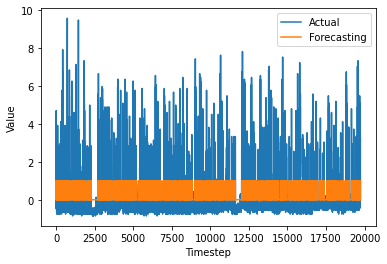

In [ ]:
print('Actual :', test_y)
print('Predicted:', yhat)
# plot history
pyplot.plot(test_y, label='Actual')
pyplot.plot(yhat, label='Forecasting')
pyplot.xlabel('Timestep')
pyplot.ylabel('Value')
pyplot.legend()
pyplot.show()

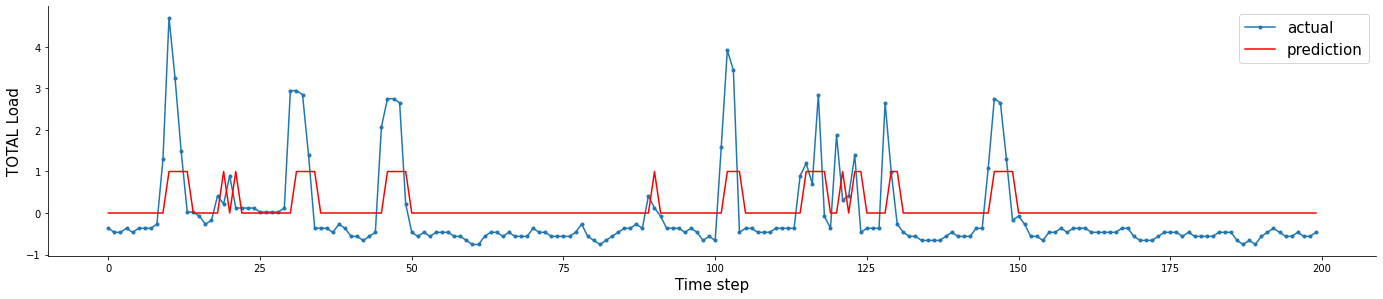

In [ ]:
idx = 200#int(len(yhat))
aa=[x for x in range(idx)]
pyplot.figure(figsize=(20,4))
pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
pyplot.tight_layout()
sns.despine(top=True)
pyplot.subplots_adjust(left=0.07)
pyplot.ylabel('TOTAL Load', size=15)
pyplot.xlabel('Time step', size=15)
pyplot.legend(fontsize=15)
pyplot.show()

# 5 run grid

## tanh zscore

Epoch 1/50
198/198 [==============================] - 29s 37ms/step - loss: 0.8264 - val_loss: 0.6844
Epoch 2/50
198/198 [==============================] - 4s 18ms/step - loss: 0.6818 - val_loss: 0.6804
Epoch 3/50
198/198 [==============================] - 4s 18ms/step - loss: 0.6804 - val_loss: 0.6799
Epoch 4/50
198/198 [==============================] - 3s 17ms/step - loss: 0.6799 - val_loss: 0.6794
Epoch 5/50
198/198 [==============================] - 2s 11ms/step - loss: 0.6794 - val_loss: 0.6793
Epoch 6/50
198/198 [==============================] - 2s 11ms/step - loss: 0.6793 - val_loss: 0.6791
Epoch 7/50
198/198 [==============================] - 2s 10ms/step - loss: 0.6792 - val_loss: 0.6789
Epoch 8/50
198/198 [==============================] - 2s 10ms/step - loss: 0.6791 - val_loss: 0.6789
Epoch 9/50
198/198 [==============================] - 2s 11ms/step - loss: 0.6787 - val_loss: 0.6787
Epoch 10/50
198/198 [==============================] - 3s 14ms/step - loss: 0.6785 - val_l

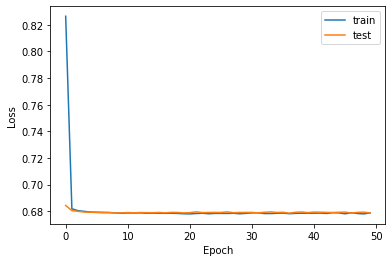

==============minmax===================
MAPE test is : 144.17461
MAPE test invert is : 76.53620
==============zscore===================
MAPE test is : 29639176.60850
MAPE test invert is : 45.87038
RMSE Testing is : 0.824
RMSE Testing invert is : 84.459
R2 test is : 0.32136


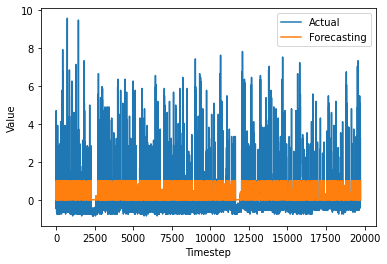

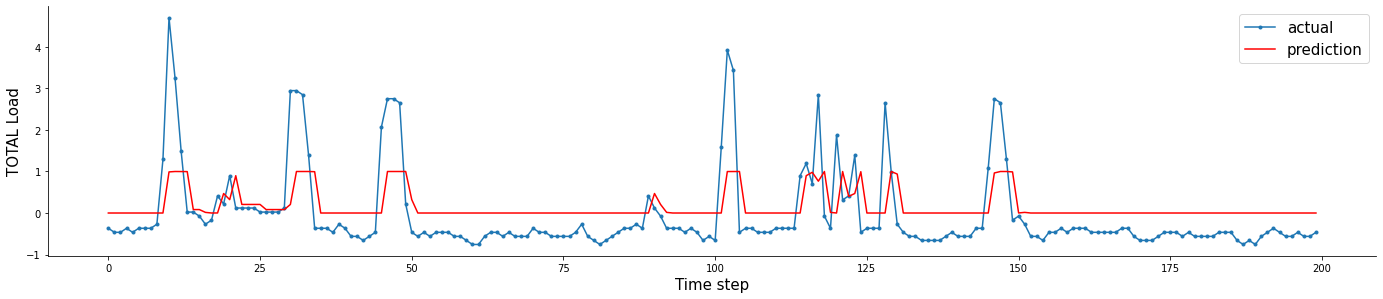

Epoch 1/50
198/198 [==============================] - 13s 20ms/step - loss: 0.8369 - val_loss: 0.6849
Epoch 2/50
198/198 [==============================] - 2s 12ms/step - loss: 0.6821 - val_loss: 0.6806
Epoch 3/50
198/198 [==============================] - 2s 11ms/step - loss: 0.6805 - val_loss: 0.6798
Epoch 4/50
198/198 [==============================] - 2s 10ms/step - loss: 0.6798 - val_loss: 0.6793
Epoch 5/50
198/198 [==============================] - 2s 12ms/step - loss: 0.6791 - val_loss: 0.6792
Epoch 6/50
198/198 [==============================] - 2s 12ms/step - loss: 0.6790 - val_loss: 0.6790
Epoch 7/50
198/198 [==============================] - 3s 14ms/step - loss: 0.6788 - val_loss: 0.6789
Epoch 8/50
198/198 [==============================] - 2s 12ms/step - loss: 0.6788 - val_loss: 0.6790
Epoch 9/50
198/198 [==============================] - 2s 11ms/step - loss: 0.6790 - val_loss: 0.6790
Epoch 10/50
198/198 [==============================] - 2s 12ms/step - loss: 0.6788 - val_l

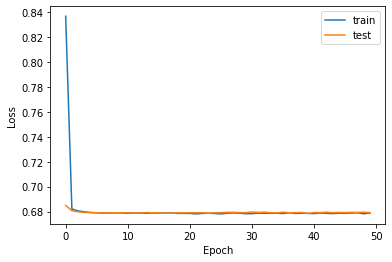

==============minmax===================
MAPE test is : 141.94587
MAPE test invert is : 76.39784
==============zscore===================
MAPE test is : 19868996.18295
MAPE test invert is : 45.86688
RMSE Testing is : 0.824
RMSE Testing invert is : 84.488
R2 test is : 0.32090


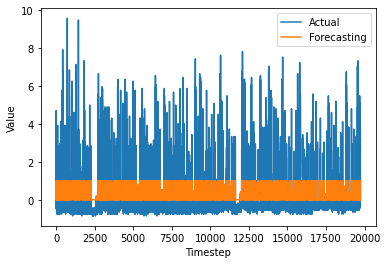

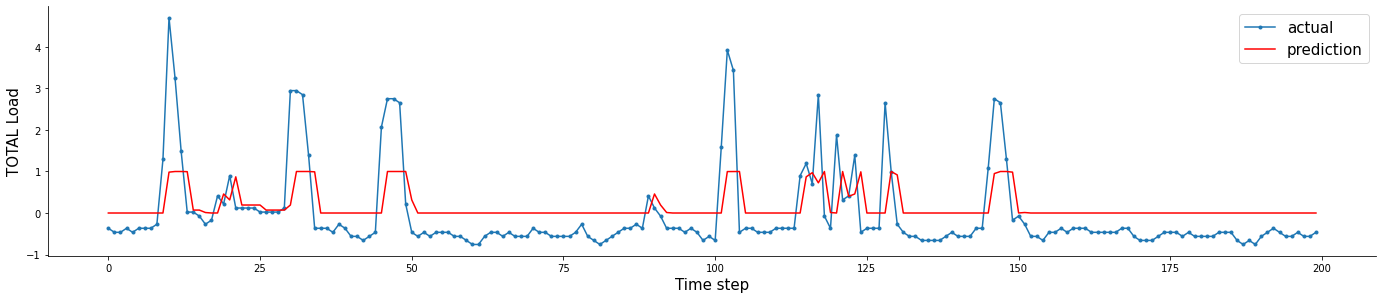

Epoch 1/50
198/198 [==============================] - 14s 17ms/step - loss: 0.8258 - val_loss: 0.6831
Epoch 2/50
198/198 [==============================] - 3s 14ms/step - loss: 0.6814 - val_loss: 0.6802
Epoch 3/50
198/198 [==============================] - 3s 13ms/step - loss: 0.6803 - val_loss: 0.6799
Epoch 4/50
198/198 [==============================] - 2s 11ms/step - loss: 0.6798 - val_loss: 0.6796
Epoch 5/50
198/198 [==============================] - 2s 11ms/step - loss: 0.6800 - val_loss: 0.6791
Epoch 6/50
198/198 [==============================] - 2s 12ms/step - loss: 0.6793 - val_loss: 0.6794
Epoch 7/50
198/198 [==============================] - 2s 12ms/step - loss: 0.6791 - val_loss: 0.6792
Epoch 8/50
198/198 [==============================] - 3s 16ms/step - loss: 0.6795 - val_loss: 0.6789
Epoch 9/50
198/198 [==============================] - 2s 12ms/step - loss: 0.6789 - val_loss: 0.6788
Epoch 10/50
198/198 [==============================] - 2s 10ms/step - loss: 0.6790 - val_l

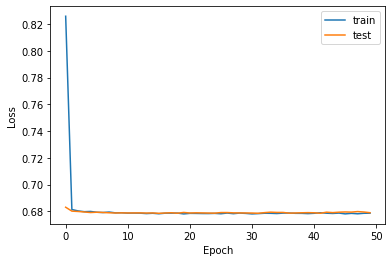

==============minmax===================
MAPE test is : 143.86062
MAPE test invert is : 76.49552
==============zscore===================
MAPE test is : 22404471.75455
MAPE test invert is : 45.87934
RMSE Testing is : 0.824
RMSE Testing invert is : 84.480
R2 test is : 0.32102


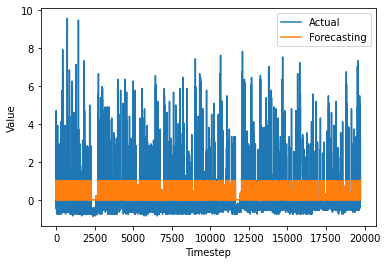

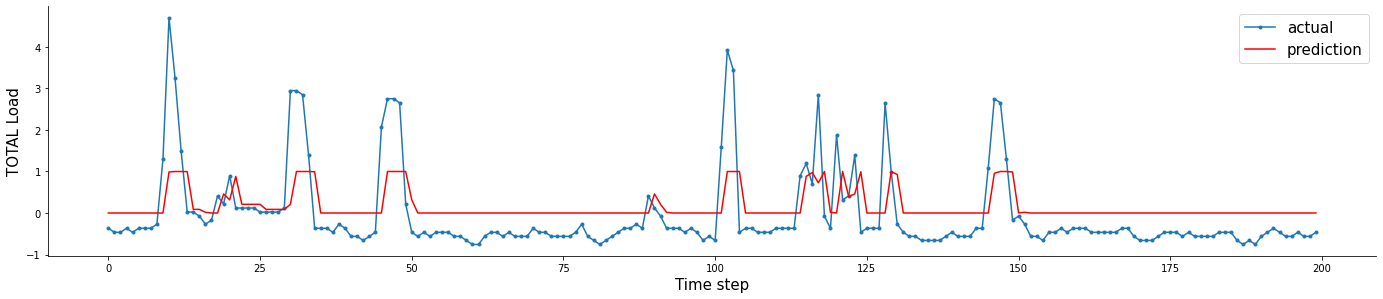

Epoch 1/50
198/198 [==============================] - 14s 16ms/step - loss: 0.8211 - val_loss: 0.6835
Epoch 2/50
198/198 [==============================] - 2s 12ms/step - loss: 0.6815 - val_loss: 0.6804
Epoch 3/50
198/198 [==============================] - 2s 12ms/step - loss: 0.6806 - val_loss: 0.6798
Epoch 4/50
198/198 [==============================] - 3s 13ms/step - loss: 0.6799 - val_loss: 0.6799
Epoch 5/50
198/198 [==============================] - 3s 14ms/step - loss: 0.6797 - val_loss: 0.6794
Epoch 6/50
198/198 [==============================] - 2s 11ms/step - loss: 0.6792 - val_loss: 0.6793
Epoch 7/50
198/198 [==============================] - 2s 12ms/step - loss: 0.6789 - val_loss: 0.6792
Epoch 8/50
198/198 [==============================] - 2s 12ms/step - loss: 0.6795 - val_loss: 0.6790
Epoch 9/50
198/198 [==============================] - 2s 12ms/step - loss: 0.6791 - val_loss: 0.6787
Epoch 10/50
198/198 [==============================] - 3s 16ms/step - loss: 0.6787 - val_l

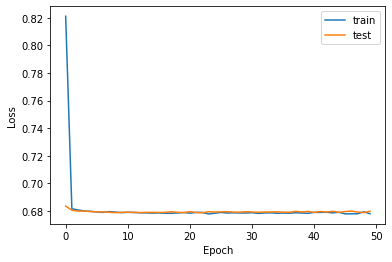

==============minmax===================
MAPE test is : 142.16121
MAPE test invert is : 76.36386
==============zscore===================
MAPE test is : 15149360.59176
MAPE test invert is : 45.89791
RMSE Testing is : 0.824
RMSE Testing invert is : 84.524
R2 test is : 0.32032


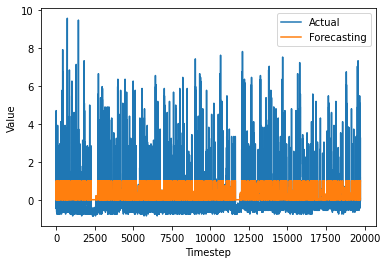

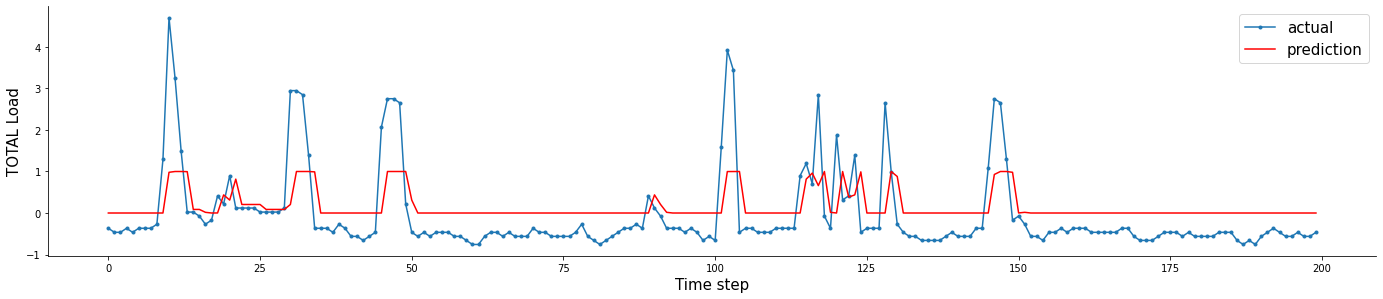

Epoch 1/50
198/198 [==============================] - 13s 16ms/step - loss: 0.8169 - val_loss: 0.6836
Epoch 2/50
198/198 [==============================] - 2s 10ms/step - loss: 0.6817 - val_loss: 0.6804
Epoch 3/50
198/198 [==============================] - 2s 12ms/step - loss: 0.6802 - val_loss: 0.6796
Epoch 4/50
198/198 [==============================] - 4s 19ms/step - loss: 0.6799 - val_loss: 0.6794
Epoch 5/50
198/198 [==============================] - 2s 12ms/step - loss: 0.6793 - val_loss: 0.6793
Epoch 6/50
198/198 [==============================] - 2s 12ms/step - loss: 0.6795 - val_loss: 0.6790
Epoch 7/50
198/198 [==============================] - 2s 11ms/step - loss: 0.6790 - val_loss: 0.6788
Epoch 8/50
198/198 [==============================] - 2s 12ms/step - loss: 0.6789 - val_loss: 0.6790
Epoch 9/50
198/198 [==============================] - 3s 17ms/step - loss: 0.6789 - val_loss: 0.6786
Epoch 10/50
198/198 [==============================] - 2s 12ms/step - loss: 0.6787 - val_l

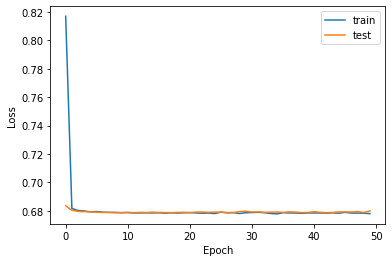

==============minmax===================
MAPE test is : 141.57267
MAPE test invert is : 76.33094
==============zscore===================
MAPE test is : 19761117.56546
MAPE test invert is : 45.89218
RMSE Testing is : 0.825
RMSE Testing invert is : 84.539
R2 test is : 0.32008


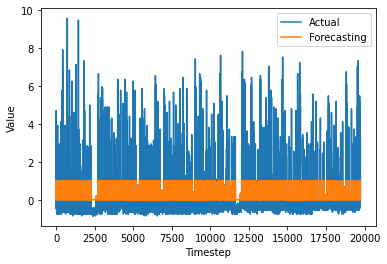

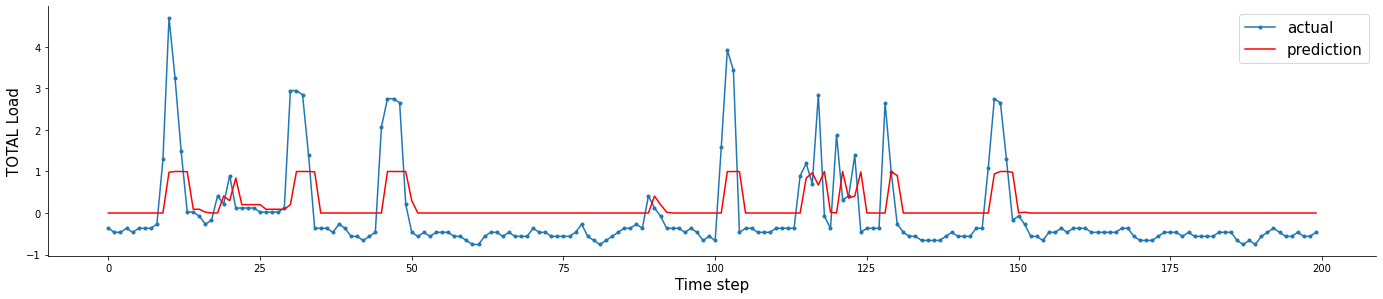

,0,1,2,3,4,nama
0,"144,17461182187165","141,94587185586155","143,86061963594787","142,1612145280365","141,57266887410864",mminmax
1,"76,5361968260434","76,39784153464178","76,49552332292822","76,36385941874006","76,33094430559815",minmax invert
2,"29639176,60850464","19868996,182952866","22404471,754545286","15149360,591756536","19761117,565460183",zscore
3,"45,8703799711806","45,86687913987787","45,879340632030704","45,89790806766526","45,89218484114777",zscpre invert
4,0.8238147867260966,0.8240918748316648,0.8240175614210167,0.8244469291704623,0.8245882273859068,rmse
5,"84,45938091349693","84,48778862143305","84,48016984017536","84,52418960637367","84,53867582341289",rmse invert
6,"0,3213589374179542","0,3209023420924342","0,3210248133586764","0,3203170468869264","0,3200840513727169",r2
7,147,151,153,134,140,waktu


In [19]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto
import shutil

mapem = []
mapemi = []
mapez = []
mapezi = []
r = []
ri = []
r2 = []
w = []

datat = []

for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

  #design network LSTM
  model = Sequential()
  model.add(GRU(32, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'tanh'))
  model.add(Dropout(0.2))

  model.add(GRU(units = 32, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(GRU(units = 32, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='mse', optimizer='rmsprop')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=50, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))
  waktu = end-start

  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.show()
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  mapemin = (mape(test_y, yhat))*100
  print(f'MAPE test is : %.5f' % mapemin)
  mapemini = (mape(inv_y, inv_yhat))*100
  print(f'MAPE test invert is : %.5f' % mapemini)

  print('==============zscore===================')
  mapezs = (mape(yhat, test_y))*100
  print(f'MAPE test is : %.5f' % mapezs)
  mapezsi = (mape(inv_yhat, inv_y))*100
  print(f'MAPE test invert is : %.5f' % mapezsi)

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  rs = r2_score(test_y, yhat)
  print(f'R2 test is : %.5f' % rs)
  # print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')

  mapem.append(str(mapemin).replace('.', ','))
  mapemi.append(str(mapemini).replace('.', ','))
  mapez.append(str(mapezs).replace('.', ','))
  mapezi.append(str(mapezsi).replace('.', ','))
  r.append(str(rmsetest))
  ri.append(str(rmsetestinvert).replace('.', ','))
  r2.append(str(rs).replace('.', ','))
  w.append(str(round(waktu)))



  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto")

datat.append(mapem)
datat.append(mapemi)
datat.append(mapez)
datat.append(mapezi)
datat.append(r)
datat.append(ri)
datat.append(r2)
datat.append(w)
  
# Create the pandas DataFrame
dc = pd.DataFrame(datat)

nama = ['mminmax', 'minmax invert', 'zscore', 'zscpre invert', 'rmse', ' rmse invert', 'r2', 'waktu']
dc['nama'] = nama
# print dataframe.
dc

## tanh minmax

Epoch 1/50
198/198 [==============================] - 18s 39ms/step - loss: 0.0327 - val_loss: 0.0094
Epoch 2/50
198/198 [==============================] - 3s 13ms/step - loss: 0.0083 - val_loss: 0.0051
Epoch 3/50
198/198 [==============================] - 3s 17ms/step - loss: 0.0053 - val_loss: 0.0046
Epoch 4/50
198/198 [==============================] - 4s 22ms/step - loss: 0.0049 - val_loss: 0.0045
Epoch 5/50
198/198 [==============================] - 3s 14ms/step - loss: 0.0048 - val_loss: 0.0044
Epoch 6/50
198/198 [==============================] - 3s 17ms/step - loss: 0.0047 - val_loss: 0.0043
Epoch 7/50
198/198 [==============================] - 6s 30ms/step - loss: 0.0047 - val_loss: 0.0043
Epoch 8/50
198/198 [==============================] - 3s 14ms/step - loss: 0.0045 - val_loss: 0.0042
Epoch 9/50
198/198 [==============================] - 3s 14ms/step - loss: 0.0044 - val_loss: 0.0041
Epoch 10/50
198/198 [==============================] - 3s 14ms/step - loss: 0.0044 - val_l

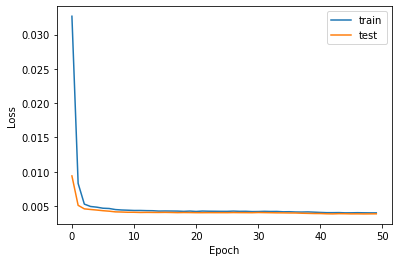

==============minmax===================
MAPE test is : 7316051607842.27344
MAPE test invert is : 34.10382
==============zscore===================
MAPE test is : 32.65451
MAPE test invert is : 28.59245
RMSE Testing is : 0.062
RMSE Testing invert is : 66.597
R2 test is : 0.57805


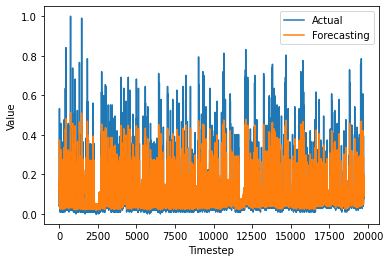

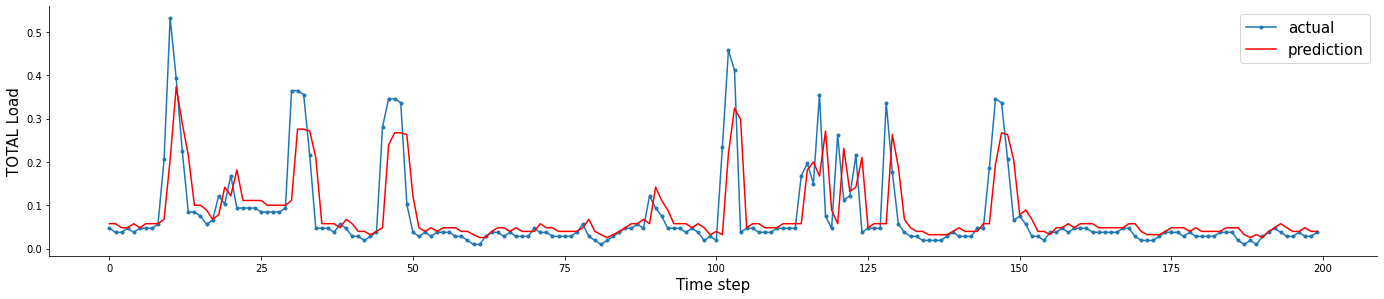

Epoch 1/50
198/198 [==============================] - 13s 18ms/step - loss: 0.0339 - val_loss: 0.0094
Epoch 2/50
198/198 [==============================] - 2s 11ms/step - loss: 0.0082 - val_loss: 0.0050
Epoch 3/50
198/198 [==============================] - 2s 11ms/step - loss: 0.0053 - val_loss: 0.0046
Epoch 4/50
198/198 [==============================] - 2s 11ms/step - loss: 0.0050 - val_loss: 0.0046
Epoch 5/50
198/198 [==============================] - 4s 18ms/step - loss: 0.0049 - val_loss: 0.0044
Epoch 6/50
198/198 [==============================] - 3s 16ms/step - loss: 0.0047 - val_loss: 0.0042
Epoch 7/50
198/198 [==============================] - 2s 12ms/step - loss: 0.0046 - val_loss: 0.0043
Epoch 8/50
198/198 [==============================] - 2s 12ms/step - loss: 0.0045 - val_loss: 0.0041
Epoch 9/50
198/198 [==============================] - 2s 12ms/step - loss: 0.0044 - val_loss: 0.0041
Epoch 10/50
198/198 [==============================] - 3s 15ms/step - loss: 0.0044 - val_l

KeyboardInterrupt: ignored

In [40]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
import shutil

mapem = []
mapemi = []
mapez = []
mapezi = []
r = []
ri = []
r2 = []
w = []

datat = []

for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


  #design network LSTM
  model = Sequential()
  model.add(GRU(32, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'tanh'))
  model.add(Dropout(0.2))

  model.add(GRU(units = 32, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(GRU(units = 32, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='mse', optimizer='rmsprop')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=50, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))
  waktu = end-start

  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto2") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  mapemin = (mape(test_y, yhat))*100
  print(f'MAPE test is : %.5f' % mapemin)
  mapemini = (mape(inv_y, inv_yhat))*100
  print(f'MAPE test invert is : %.5f' % mapemini)

  print('==============zscore===================')
  mapezs = (mape(yhat, test_y))*100
  print(f'MAPE test is : %.5f' % mapezs)
  mapezsi = (mape(inv_yhat, inv_y))*100
  print(f'MAPE test invert is : %.5f' % mapezsi)

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  rs = r2_score(test_y, yhat)
  print(f'R2 test is : %.5f' % rs)
  # print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')

  mapem.append(str(mapemin).replace('.', ','))
  mapemi.append(str(mapemini).replace('.', ','))
  mapez.append(str(mapezs).replace('.', ','))
  mapezi.append(str(mapezsi).replace('.', ','))
  r.append(str(rmsetest))
  ri.append(str(rmsetestinvert).replace('.', ','))
  r2.append(str(rs).replace('.', ','))
  w.append(str(round(waktu)))


  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto2")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto2")

datat.append(mapem)
datat.append(mapemi)
datat.append(mapez)
datat.append(mapezi)
datat.append(r)
datat.append(ri)
datat.append(r2)
datat.append(w)
  
# Create the pandas DataFrame
dc = pd.DataFrame(datat)

nama = ['mminmax', 'minmax invert', 'zscore', 'zscpre invert', 'rmse', ' rmse invert', 'r2', 'waktu']
dc['nama'] = nama
# print dataframe.
dc

## sig minmax

In [ ]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto3
import shutil

mapem = []
mapemi = []
mapez = []
mapezi = []
r = []
ri = []
r2 = []
w = []

datat = []

for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


  #design network LSTM
  #design network GRU
  model = Sequential()
  model.add(GRU(32, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'sigmoid'))
  model.add(Dropout(0.2))

  model.add(GRU(units = 32, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(GRU(units = 32, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='mse', optimizer='rmsprop')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=50, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))
  waktu = end-start

  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto3") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  mapemin = (mape(test_y, yhat))*100
  print(f'MAPE test is : %.5f' % mapemin)
  mapemini = (mape(inv_y, inv_yhat))*100
  print(f'MAPE test invert is : %.5f' % mapemini)

  print('==============zscore===================')
  mapezs = (mape(yhat, test_y))*100
  print(f'MAPE test is : %.5f' % mapezs)
  mapezsi = (mape(inv_yhat, inv_y))*100
  print(f'MAPE test invert is : %.5f' % mapezsi)

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  rs = r2_score(test_y, yhat)
  print(f'R2 test is : %.5f' % rs)
  # print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')

  mapem.append(str(mapemin).replace('.', ','))
  mapemi.append(str(mapemini).replace('.', ','))
  mapez.append(str(mapezs).replace('.', ','))
  mapezi.append(str(mapezsi).replace('.', ','))
  r.append(str(rmsetest))
  ri.append(str(rmsetestinvert).replace('.', ','))
  r2.append(str(rs).replace('.', ','))
  w.append(str(round(waktu)))



  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto3")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto3")

datat.append(mapem)
datat.append(mapemi)
datat.append(mapez)
datat.append(mapezi)
datat.append(r)
datat.append(ri)
datat.append(r2)
datat.append(w)
  
# Create the pandas DataFrame
dc = pd.DataFrame(datat)

nama = ['mminmax', 'minmax invert', 'zscore', 'zscpre invert', 'rmse', ' rmse invert', 'r2', 'waktu']
dc['nama'] = nama
# print dataframe.
dc

## sig zscore

Epoch 1/50
198/198 [==============================] - 15s 24ms/step - loss: 1.0457 - val_loss: 0.9905
Epoch 2/50
198/198 [==============================] - 2s 11ms/step - loss: 0.9836 - val_loss: 0.9669
Epoch 3/50
198/198 [==============================] - 2s 12ms/step - loss: 0.9483 - val_loss: 0.9076
Epoch 4/50
198/198 [==============================] - 2s 12ms/step - loss: 0.8874 - val_loss: 0.8349
Epoch 5/50
198/198 [==============================] - 2s 11ms/step - loss: 0.8171 - val_loss: 0.7638
Epoch 6/50
198/198 [==============================] - 3s 17ms/step - loss: 0.7552 - val_loss: 0.7202
Epoch 7/50
198/198 [==============================] - 2s 10ms/step - loss: 0.7170 - val_loss: 0.7000
Epoch 8/50
198/198 [==============================] - 2s 12ms/step - loss: 0.6982 - val_loss: 0.6893
Epoch 9/50
198/198 [==============================] - 2s 12ms/step - loss: 0.6930 - val_loss: 0.6852
Epoch 10/50
198/198 [==============================] - 2s 12ms/step - loss: 0.6901 - val_l

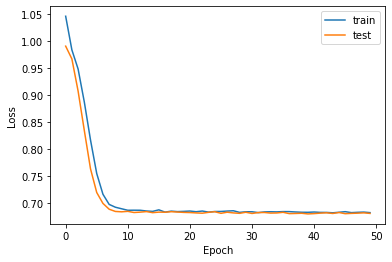

==============minmax===================
MAPE test is : 132.48219
MAPE test invert is : 76.25157
==============zscore===================
MAPE test is : 111675.65704
MAPE test invert is : 45.97085
RMSE Testing is : 0.826
RMSE Testing invert is : 84.639
R2 test is : 0.31848


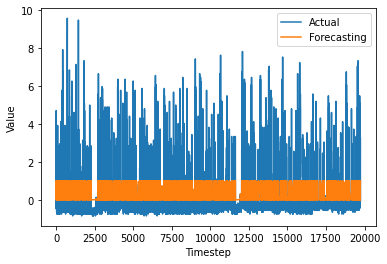

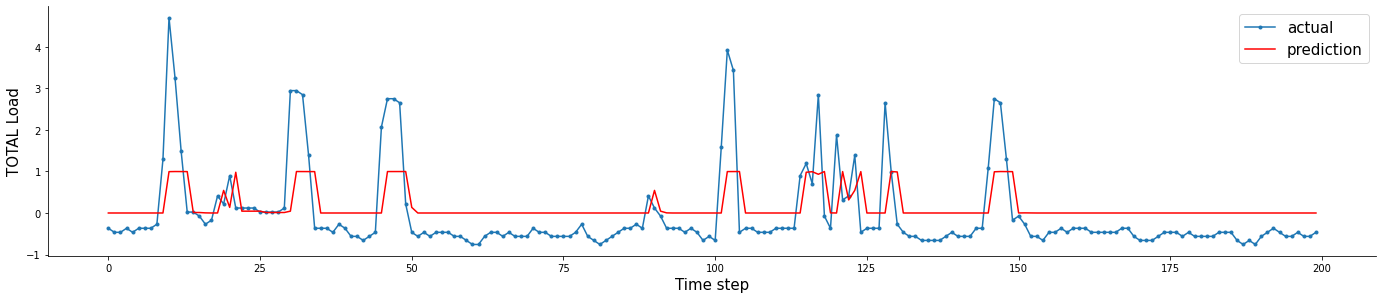

Epoch 1/50
198/198 [==============================] - 15s 20ms/step - loss: 1.0460 - val_loss: 0.9920
Epoch 2/50
198/198 [==============================] - 2s 12ms/step - loss: 0.9855 - val_loss: 0.9709
Epoch 3/50
198/198 [==============================] - 2s 12ms/step - loss: 0.9542 - val_loss: 0.9193
Epoch 4/50
198/198 [==============================] - 2s 12ms/step - loss: 0.8984 - val_loss: 0.8441
Epoch 5/50
198/198 [==============================] - 2s 11ms/step - loss: 0.8181 - val_loss: 0.7604
Epoch 6/50
198/198 [==============================] - 3s 18ms/step - loss: 0.7478 - val_loss: 0.7108
Epoch 7/50
198/198 [==============================] - 2s 12ms/step - loss: 0.7087 - val_loss: 0.6908
Epoch 8/50
198/198 [==============================] - 2s 12ms/step - loss: 0.6954 - val_loss: 0.6873
Epoch 9/50
198/198 [==============================] - 2s 10ms/step - loss: 0.6887 - val_loss: 0.6851
Epoch 10/50
198/198 [==============================] - 2s 12ms/step - loss: 0.6872 - val_l

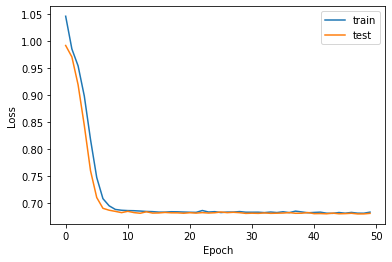

==============minmax===================
MAPE test is : 132.24988
MAPE test invert is : 76.22662
==============zscore===================
MAPE test is : 137517.57101
MAPE test invert is : 45.96634
RMSE Testing is : 0.826
RMSE Testing invert is : 84.634
R2 test is : 0.31855


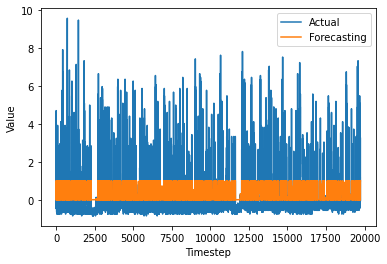

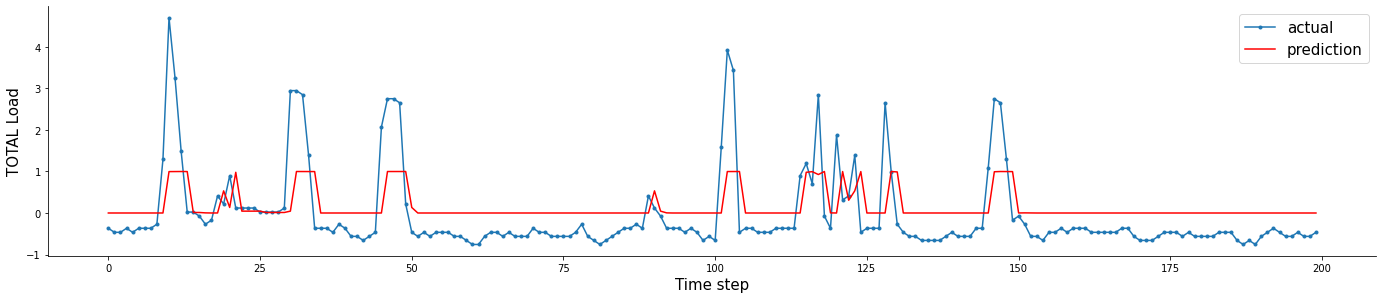

Epoch 1/50
198/198 [==============================] - 15s 19ms/step - loss: 1.0306 - val_loss: 0.9931
Epoch 2/50
198/198 [==============================] - 3s 14ms/step - loss: 0.9876 - val_loss: 0.9764
Epoch 3/50
198/198 [==============================] - 2s 12ms/step - loss: 0.9600 - val_loss: 0.9269
Epoch 4/50
198/198 [==============================] - 3s 17ms/step - loss: 0.9008 - val_loss: 0.8477
Epoch 5/50
198/198 [==============================] - 2s 13ms/step - loss: 0.8205 - val_loss: 0.7627
Epoch 6/50
198/198 [==============================] - 3s 13ms/step - loss: 0.7460 - val_loss: 0.7091
Epoch 7/50
198/198 [==============================] - 3s 13ms/step - loss: 0.7060 - val_loss: 0.6889
Epoch 8/50
198/198 [==============================] - 2s 12ms/step - loss: 0.6919 - val_loss: 0.6846
Epoch 9/50
198/198 [==============================] - 3s 17ms/step - loss: 0.6877 - val_loss: 0.6843
Epoch 10/50
198/198 [==============================] - 2s 13ms/step - loss: 0.6883 - val_l

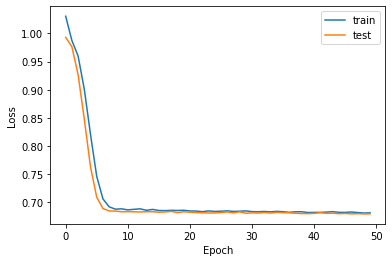

==============minmax===================
MAPE test is : 136.73901
MAPE test invert is : 76.42715
==============zscore===================
MAPE test is : 138273.20145
MAPE test invert is : 45.81676
RMSE Testing is : 0.824
RMSE Testing invert is : 84.505
R2 test is : 0.32062


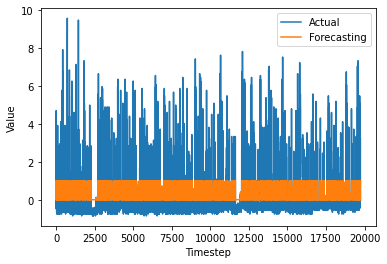

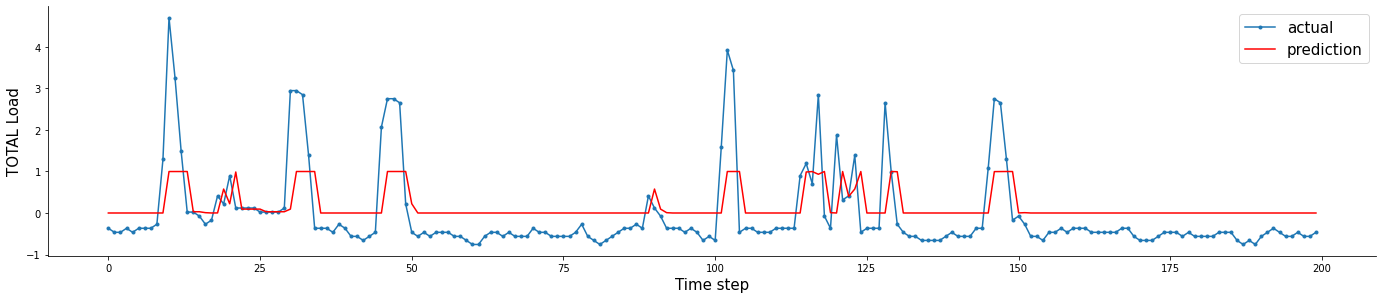

Epoch 1/50
198/198 [==============================] - 13s 17ms/step - loss: 1.0690 - val_loss: 0.9937
Epoch 2/50
198/198 [==============================] - 3s 13ms/step - loss: 0.9873 - val_loss: 0.9721
Epoch 3/50
198/198 [==============================] - 3s 13ms/step - loss: 0.9536 - val_loss: 0.9153
Epoch 4/50
198/198 [==============================] - 2s 10ms/step - loss: 0.8890 - val_loss: 0.8282
Epoch 5/50
198/198 [==============================] - 2s 10ms/step - loss: 0.8075 - val_loss: 0.7558
Epoch 6/50
198/198 [==============================] - 2s 10ms/step - loss: 0.7456 - val_loss: 0.7140
Epoch 7/50
198/198 [==============================] - 2s 11ms/step - loss: 0.7135 - val_loss: 0.6950
Epoch 8/50
198/198 [==============================] - 4s 19ms/step - loss: 0.6966 - val_loss: 0.6874
Epoch 9/50
198/198 [==============================] - 2s 11ms/step - loss: 0.6912 - val_loss: 0.6848
Epoch 10/50
198/198 [==============================] - 2s 12ms/step - loss: 0.6887 - val_l

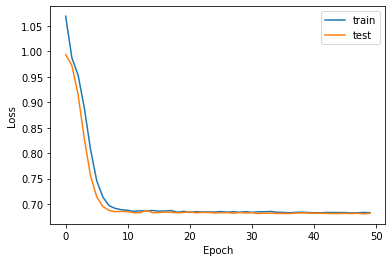

==============minmax===================
MAPE test is : 131.24987
MAPE test invert is : 76.16581
==============zscore===================
MAPE test is : 139121.37520
MAPE test invert is : 46.00542
RMSE Testing is : 0.826
RMSE Testing invert is : 84.665
R2 test is : 0.31805


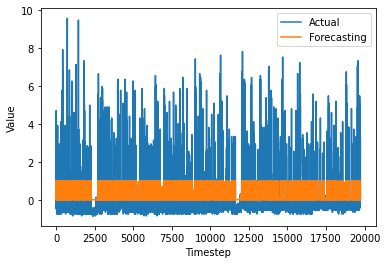

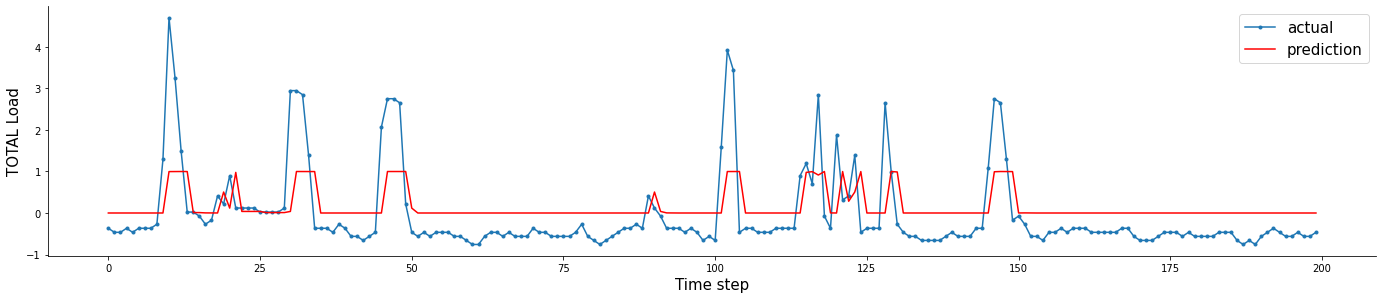

Epoch 1/50
198/198 [==============================] - 14s 19ms/step - loss: 1.0220 - val_loss: 0.9950
Epoch 2/50
198/198 [==============================] - 3s 13ms/step - loss: 0.9901 - val_loss: 0.9808
Epoch 3/50
198/198 [==============================] - 3s 14ms/step - loss: 0.9660 - val_loss: 0.9373
Epoch 4/50
198/198 [==============================] - 3s 16ms/step - loss: 0.9086 - val_loss: 0.8573
Epoch 5/50
198/198 [==============================] - 2s 12ms/step - loss: 0.8309 - val_loss: 0.7737
Epoch 6/50
198/198 [==============================] - 2s 12ms/step - loss: 0.7608 - val_loss: 0.7200
Epoch 7/50
198/198 [==============================] - 3s 13ms/step - loss: 0.7174 - val_loss: 0.6946
Epoch 8/50
198/198 [==============================] - 3s 14ms/step - loss: 0.6979 - val_loss: 0.6881
Epoch 9/50
198/198 [==============================] - 3s 15ms/step - loss: 0.6902 - val_loss: 0.6873
Epoch 10/50
198/198 [==============================] - 3s 13ms/step - loss: 0.6891 - val_l

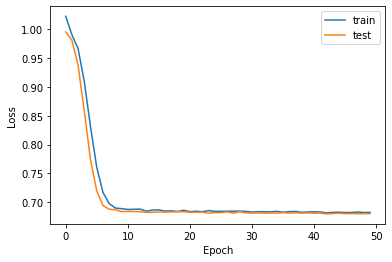

==============minmax===================
MAPE test is : 133.83168
MAPE test invert is : 76.30522
==============zscore===================
MAPE test is : 124812.29720
MAPE test invert is : 45.89634
RMSE Testing is : 0.825
RMSE Testing invert is : 84.574
R2 test is : 0.31952


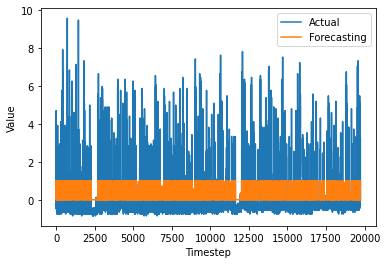

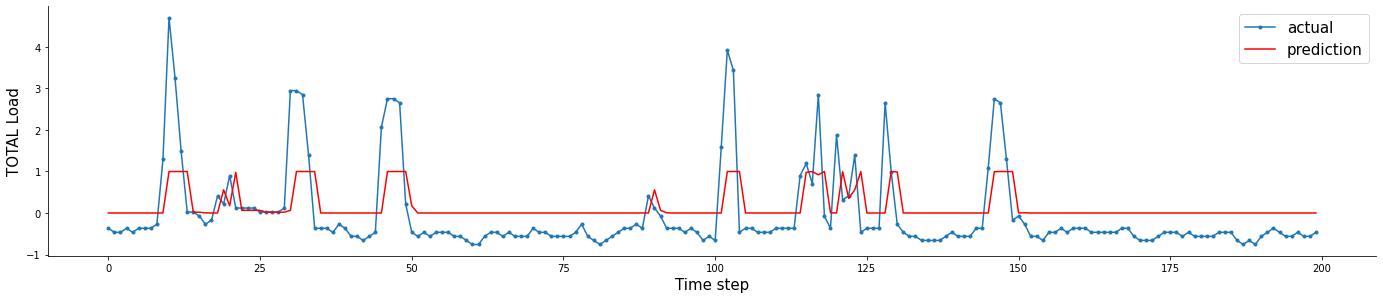

,0,1,2,3,4,nama
0,"132,48219321711673","132,24988059413747","136,73901490964104","131,2498749740891","133,83168441254074",mminmax
1,"76,25157482946446","76,22662312989857","76,42715128134138","76,16580964534347","76,30521637579886",minmax invert
2,"111675,65703905412","137517,57101094216","138273,20145313558","139121,37519924899","124812,29719645368",zscore
3,"45,97084509849848","45,966342927638934","45,81676448471796","46,00542475689938","45,896337398974126",zscpre invert
4,0.8255627905900768,0.8255178841283445,0.8242616752795635,0.8258216500809694,0.8249323615036994,rmse
5,"84,63859027774355","84,63398636431782","84,50519695269809","84,66512914630557","84,57395724225641",rmse invert
6,"0,3184759453816799","0,3185500863237203","0,32062246318652887","0,3180484875786833","0,31951641993552415",r2
7,133,135,153,152,152,waktu


In [20]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto4
import shutil

mapem = []
mapemi = []
mapez = []
mapezi = []
r = []
ri = []
r2 = []
w = []

datat = []

for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


  #design network LSTM
  model = Sequential()
  model.add(GRU(32, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'sigmoid'))
  model.add(Dropout(0.2))

  model.add(GRU(units = 32, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(GRU(units = 32, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='mse', optimizer='rmsprop')




  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=50, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))
  waktu = end-start

  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto4") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  mapemin = (mape(test_y, yhat))*100
  print(f'MAPE test is : %.5f' % mapemin)
  mapemini = (mape(inv_y, inv_yhat))*100
  print(f'MAPE test invert is : %.5f' % mapemini)

  print('==============zscore===================')
  mapezs = (mape(yhat, test_y))*100
  print(f'MAPE test is : %.5f' % mapezs)
  mapezsi = (mape(inv_yhat, inv_y))*100
  print(f'MAPE test invert is : %.5f' % mapezsi)

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  rs = r2_score(test_y, yhat)
  print(f'R2 test is : %.5f' % rs)
  # print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')

  mapem.append(str(mapemin).replace('.', ','))
  mapemi.append(str(mapemini).replace('.', ','))
  mapez.append(str(mapezs).replace('.', ','))
  mapezi.append(str(mapezsi).replace('.', ','))
  r.append(str(rmsetest))
  ri.append(str(rmsetestinvert).replace('.', ','))
  r2.append(str(rs).replace('.', ','))
  w.append(str(round(waktu)))


  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto4")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto4")

datat.append(mapem)
datat.append(mapemi)
datat.append(mapez)
datat.append(mapezi)
datat.append(r)
datat.append(ri)
datat.append(r2)
datat.append(w)
  
# Create the pandas DataFrame
dc = pd.DataFrame(datat)

nama = ['mminmax', 'minmax invert', 'zscore', 'zscpre invert', 'rmse', ' rmse invert', 'r2', 'waktu']
dc['nama'] = nama
# print dataframe.
dc

# 5 run random

## tanh zscore

Epoch 1/66
198/198 [==============================] - 35s 41ms/step - loss: 0.9984 - val_loss: 0.7370
Epoch 2/66
198/198 [==============================] - 4s 20ms/step - loss: 0.7143 - val_loss: 0.6968
Epoch 3/66
198/198 [==============================] - 5s 26ms/step - loss: 0.6974 - val_loss: 0.6934
Epoch 4/66
198/198 [==============================] - 4s 20ms/step - loss: 0.6931 - val_loss: 0.6892
Epoch 5/66
198/198 [==============================] - 5s 23ms/step - loss: 0.6916 - val_loss: 0.6887
Epoch 6/66
198/198 [==============================] - 5s 23ms/step - loss: 0.6896 - val_loss: 0.6862
Epoch 7/66
198/198 [==============================] - 4s 20ms/step - loss: 0.6892 - val_loss: 0.6858
Epoch 8/66
198/198 [==============================] - 4s 21ms/step - loss: 0.6878 - val_loss: 0.6845
Epoch 9/66
198/198 [==============================] - 4s 23ms/step - loss: 0.6866 - val_loss: 0.6839
Epoch 10/66
198/198 [==============================] - 4s 19ms/step - loss: 0.6859 - val_l

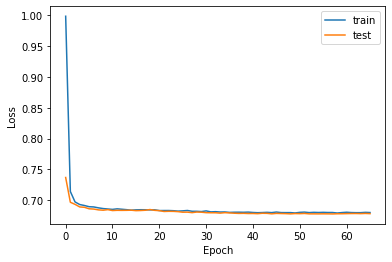

==============minmax===================
MAPE test is : 142.99708
MAPE test invert is : 76.56301
==============zscore===================
MAPE test is : 22147473.46611
MAPE test invert is : 45.82346
RMSE Testing is : 0.824
RMSE Testing invert is : 84.440
R2 test is : 0.32168


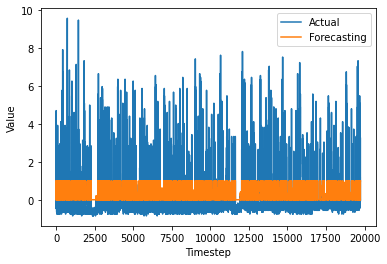

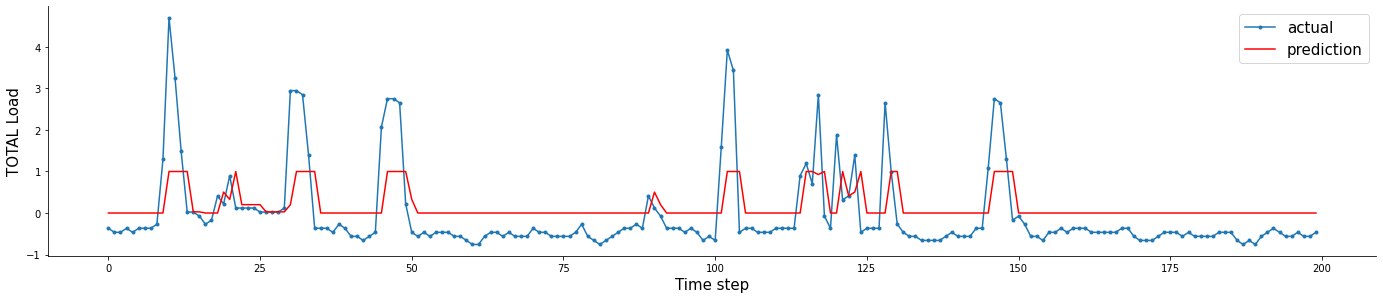

Epoch 1/66
198/198 [==============================] - 34s 38ms/step - loss: 0.9791 - val_loss: 0.7356
Epoch 2/66
198/198 [==============================] - 4s 20ms/step - loss: 0.7194 - val_loss: 0.7004
Epoch 3/66
198/198 [==============================] - 4s 20ms/step - loss: 0.7010 - val_loss: 0.6934
Epoch 4/66
198/198 [==============================] - 5s 26ms/step - loss: 0.6942 - val_loss: 0.6896
Epoch 5/66
198/198 [==============================] - 4s 20ms/step - loss: 0.6911 - val_loss: 0.6886
Epoch 6/66
198/198 [==============================] - 4s 20ms/step - loss: 0.6907 - val_loss: 0.6864
Epoch 7/66
198/198 [==============================] - 5s 26ms/step - loss: 0.6894 - val_loss: 0.6857
Epoch 8/66
198/198 [==============================] - 4s 21ms/step - loss: 0.6870 - val_loss: 0.6852
Epoch 9/66
198/198 [==============================] - 4s 22ms/step - loss: 0.6874 - val_loss: 0.6850
Epoch 10/66
198/198 [==============================] - 5s 27ms/step - loss: 0.6856 - val_l

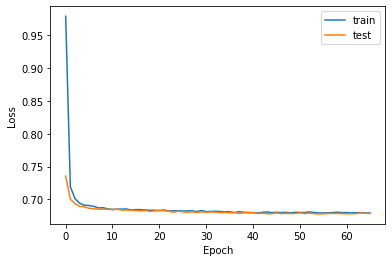

==============minmax===================
MAPE test is : 141.50887
MAPE test invert is : 76.45165
==============zscore===================
MAPE test is : 22128749.82715
MAPE test invert is : 45.80141
RMSE Testing is : 0.824
RMSE Testing invert is : 84.449
R2 test is : 0.32153


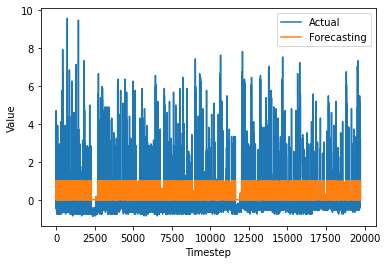

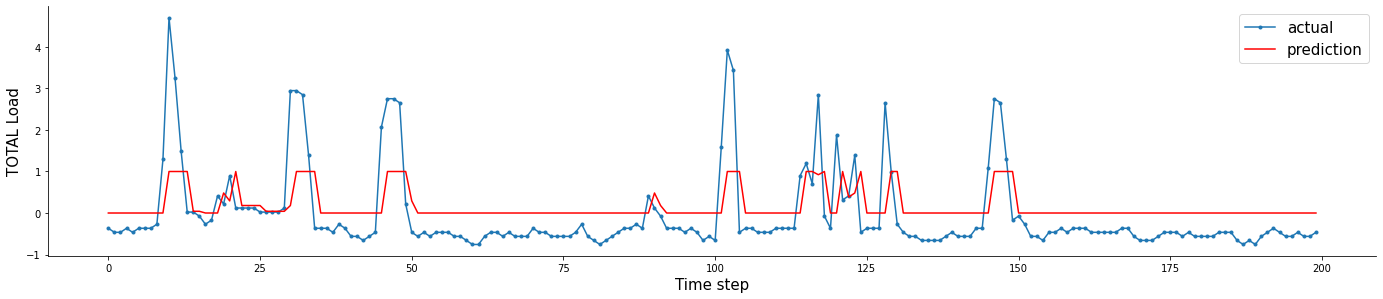

Epoch 1/66
198/198 [==============================] - 33s 35ms/step - loss: 0.9993 - val_loss: 0.7482
Epoch 2/66
198/198 [==============================] - 5s 26ms/step - loss: 0.7241 - val_loss: 0.7034
Epoch 3/66
198/198 [==============================] - 4s 21ms/step - loss: 0.7029 - val_loss: 0.6937
Epoch 4/66
198/198 [==============================] - 4s 21ms/step - loss: 0.6954 - val_loss: 0.6922
Epoch 5/66
198/198 [==============================] - 5s 27ms/step - loss: 0.6920 - val_loss: 0.6882
Epoch 6/66
198/198 [==============================] - 4s 21ms/step - loss: 0.6903 - val_loss: 0.6861
Epoch 7/66
198/198 [==============================] - 5s 23ms/step - loss: 0.6883 - val_loss: 0.6853
Epoch 8/66
198/198 [==============================] - 5s 28ms/step - loss: 0.6873 - val_loss: 0.6846
Epoch 9/66
198/198 [==============================] - 5s 24ms/step - loss: 0.6865 - val_loss: 0.6850
Epoch 10/66
198/198 [==============================] - 5s 27ms/step - loss: 0.6869 - val_l

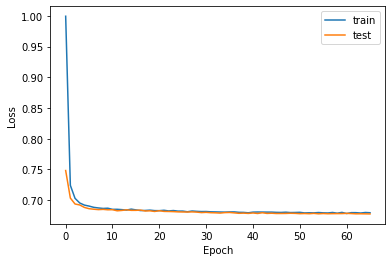

==============minmax===================
MAPE test is : 150.42982
MAPE test invert is : 76.97867
==============zscore===================
MAPE test is : 10665911.39393
MAPE test invert is : 45.89891
RMSE Testing is : 0.823
RMSE Testing invert is : 84.393
R2 test is : 0.32242


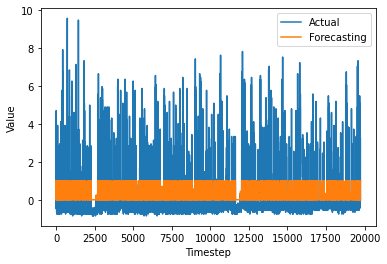

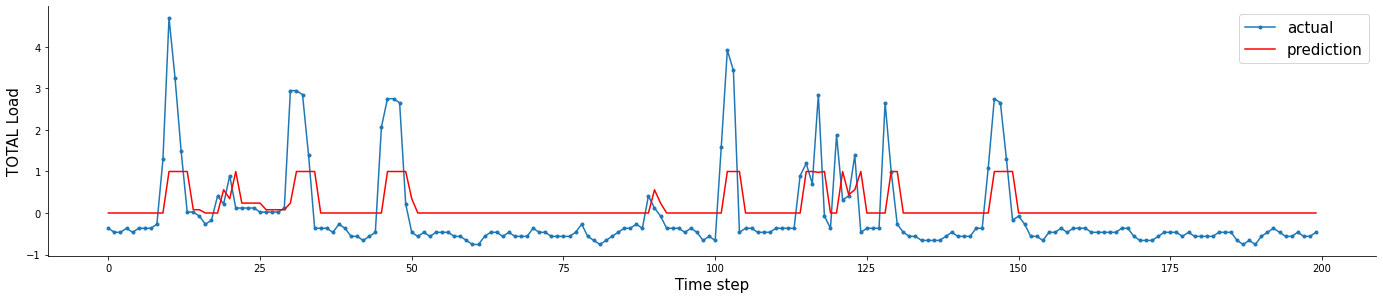

Epoch 1/66
198/198 [==============================] - 32s 39ms/step - loss: 0.9671 - val_loss: 0.7302
Epoch 2/66
198/198 [==============================] - 5s 25ms/step - loss: 0.7143 - val_loss: 0.6985
Epoch 3/66
198/198 [==============================] - 5s 25ms/step - loss: 0.6978 - val_loss: 0.6918
Epoch 4/66
198/198 [==============================] - 4s 22ms/step - loss: 0.6935 - val_loss: 0.6888
Epoch 5/66
198/198 [==============================] - 4s 21ms/step - loss: 0.6916 - val_loss: 0.6872
Epoch 6/66
198/198 [==============================] - 5s 26ms/step - loss: 0.6886 - val_loss: 0.6864
Epoch 7/66
198/198 [==============================] - 4s 21ms/step - loss: 0.6884 - val_loss: 0.6853
Epoch 8/66
198/198 [==============================] - 4s 21ms/step - loss: 0.6864 - val_loss: 0.6856
Epoch 9/66
198/198 [==============================] - 5s 27ms/step - loss: 0.6866 - val_loss: 0.6847
Epoch 10/66
198/198 [==============================] - 4s 21ms/step - loss: 0.6861 - val_l

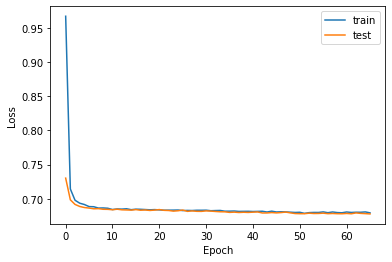

==============minmax===================
MAPE test is : 146.47472
MAPE test invert is : 76.78130
==============zscore===================
MAPE test is : 16169158.96516
MAPE test invert is : 45.82759
RMSE Testing is : 0.823
RMSE Testing invert is : 84.408
R2 test is : 0.32218


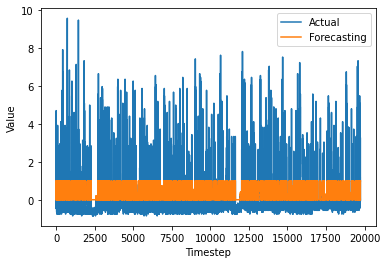

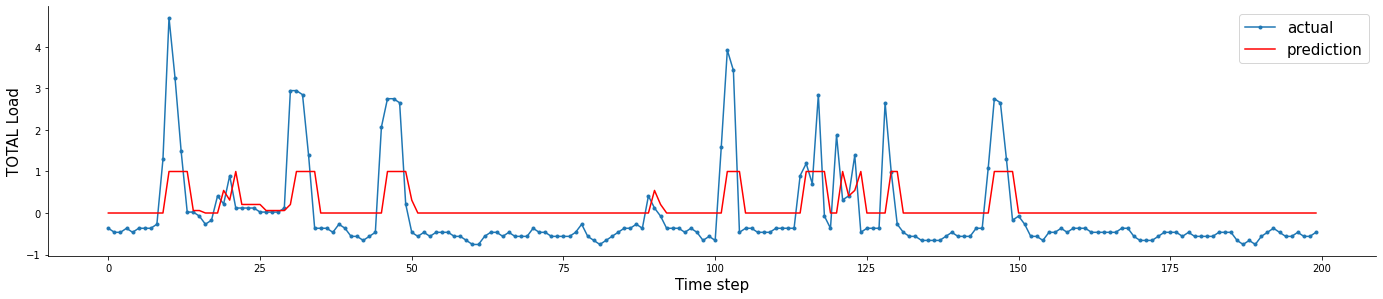

Epoch 1/66
198/198 [==============================] - 36s 41ms/step - loss: 1.0186 - val_loss: 0.7505
Epoch 2/66
198/198 [==============================] - 4s 22ms/step - loss: 0.7252 - val_loss: 0.7025
Epoch 3/66
198/198 [==============================] - 5s 27ms/step - loss: 0.7024 - val_loss: 0.6936
Epoch 4/66
198/198 [==============================] - 4s 22ms/step - loss: 0.6965 - val_loss: 0.6910
Epoch 5/66
198/198 [==============================] - 5s 24ms/step - loss: 0.6918 - val_loss: 0.6880
Epoch 6/66
198/198 [==============================] - 5s 25ms/step - loss: 0.6899 - val_loss: 0.6882
Epoch 7/66
198/198 [==============================] - 4s 23ms/step - loss: 0.6903 - val_loss: 0.6855
Epoch 8/66
198/198 [==============================] - 5s 27ms/step - loss: 0.6866 - val_loss: 0.6858
Epoch 9/66
198/198 [==============================] - 4s 23ms/step - loss: 0.6863 - val_loss: 0.6859
Epoch 10/66
198/198 [==============================] - 5s 23ms/step - loss: 0.6857 - val_l

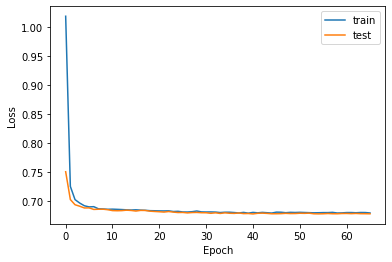

==============minmax===================
MAPE test is : 144.64750
MAPE test invert is : 76.66400
==============zscore===================
MAPE test is : 12568115.58910
MAPE test invert is : 45.81493
RMSE Testing is : 0.823
RMSE Testing invert is : 84.416
R2 test is : 0.32205


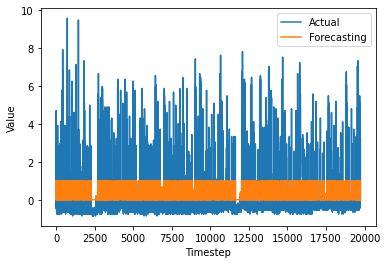

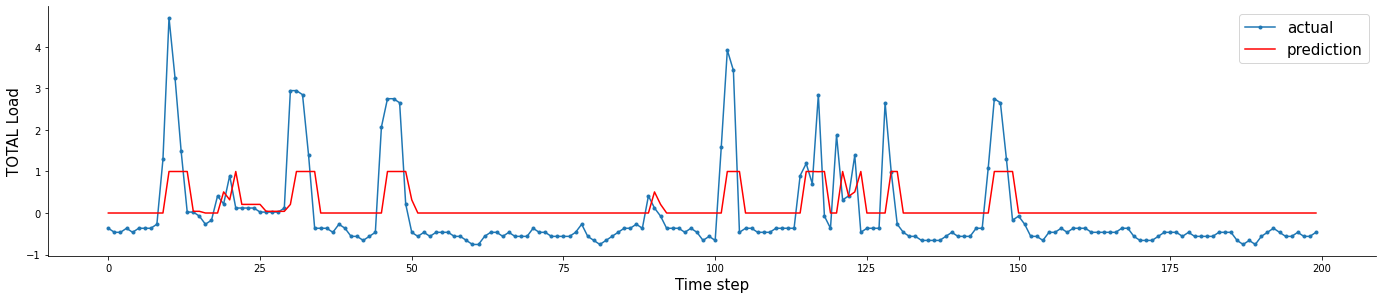

,0,1,2,3,4,nama
0,"142,9970809264177","141,50887452222864","150,42981533435943","146,47471901546749","144,64750350305223",mminmax
1,"76,56300656461332","76,45164609886356","76,97867004069961","76,78130388651786","76,66399883982433",minmax invert
2,"22147473,466105912","22128749,82715416","10665911,393927852","16169158,965160288","12568115,589099107",zscore
3,"45,82345985259103","45,801408491744844","45,898905485977295","45,8275877217278","45,814932274078295",zscpre invert
4,0.823622663911433,0.823709823034076,0.8231684491853971,0.8233181848778824,0.8233953623137904,rmse
5,"84,43968404200675","84,44861979511292","84,39311690679516","84,40846815332742","84,41638056102185",rmse invert
6,"0,32167543386805486","0,32153186010565793","0,32242339786412677","0,32217687085141855","0,3220497872913841",r2
7,349,352,349,336,409,waktu


In [21]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto5
import shutil

mapem = []
mapemi = []
mapez = []
mapezi = []
r = []
ri = []
r2 = []
w = []

datat = []

for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

  #design network LSTM
  model = Sequential()
  model.add(GRU(11, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'tanh'))
  model.add(Dropout(0.2))

  model.add(GRU(units = 11, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(GRU(units = 11, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(GRU(units = 11, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(GRU(units = 11, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(GRU(units = 11, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(GRU(units = 11, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(GRU(units = 11, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='mse', optimizer='adam')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=66, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))
  waktu = end-start
  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto5") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]


  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  mapemin = (mape(test_y, yhat))*100
  print(f'MAPE test is : %.5f' % mapemin)
  mapemini = (mape(inv_y, inv_yhat))*100
  print(f'MAPE test invert is : %.5f' % mapemini)

  print('==============zscore===================')
  mapezs = (mape(yhat, test_y))*100
  print(f'MAPE test is : %.5f' % mapezs)
  mapezsi = (mape(inv_yhat, inv_y))*100
  print(f'MAPE test invert is : %.5f' % mapezsi)

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  rs = r2_score(test_y, yhat)
  print(f'R2 test is : %.5f' % rs)
  # print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')

  mapem.append(str(mapemin).replace('.', ','))
  mapemi.append(str(mapemini).replace('.', ','))
  mapez.append(str(mapezs).replace('.', ','))
  mapezi.append(str(mapezsi).replace('.', ','))
  r.append(str(rmsetest))
  ri.append(str(rmsetestinvert).replace('.', ','))
  r2.append(str(rs).replace('.', ','))
  w.append(str(round(waktu)))


  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto5")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto5")

datat.append(mapem)
datat.append(mapemi)
datat.append(mapez)
datat.append(mapezi)
datat.append(r)
datat.append(ri)
datat.append(r2)
datat.append(w)
  
# Create the pandas DataFrame
dc = pd.DataFrame(datat)

nama = ['mminmax', 'minmax invert', 'zscore', 'zscpre invert', 'rmse', ' rmse invert', 'r2', 'waktu']
dc['nama'] = nama
# print dataframe.
dc

## tanh minmax

In [ ]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto6
import shutil

mapem = []
mapemi = []
mapez = []
mapezi = []
r = []
ri = []
r2 = []
w = []

datat = []

for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


  model = Sequential()
  model.add(GRU(11, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'tanh'))
  model.add(Dropout(0.2))

  model.add(GRU(units = 11, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(GRU(units = 11, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(GRU(units = 11, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(GRU(units = 11, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(GRU(units = 11, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(GRU(units = 11, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(GRU(units = 11, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='mse', optimizer='adam')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=66, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))
  waktu = end-start
  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto6") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  mapemin = (mape(test_y, yhat))*100
  print(f'MAPE test is : %.5f' % mapemin)
  mapemini = (mape(inv_y, inv_yhat))*100
  print(f'MAPE test invert is : %.5f' % mapemini)

  print('==============zscore===================')
  mapezs = (mape(yhat, test_y))*100
  print(f'MAPE test is : %.5f' % mapezs)
  mapezsi = (mape(inv_yhat, inv_y))*100
  print(f'MAPE test invert is : %.5f' % mapezsi)

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  rs = r2_score(test_y, yhat)
  print(f'R2 test is : %.5f' % rs)
  # print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')

  mapem.append(str(mapemin).replace('.', ','))
  mapemi.append(str(mapemini).replace('.', ','))
  mapez.append(str(mapezs).replace('.', ','))
  mapezi.append(str(mapezsi).replace('.', ','))
  r.append(str(rmsetest))
  ri.append(str(rmsetestinvert).replace('.', ','))
  r2.append(str(rs).replace('.', ','))
  w.append(str(round(waktu)))


  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto6")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto6")

datat.append(mapem)
datat.append(mapemi)
datat.append(mapez)
datat.append(mapezi)
datat.append(r)
datat.append(ri)
datat.append(r2)
datat.append(w)
  
# Create the pandas DataFrame
dc = pd.DataFrame(datat)

nama = ['mminmax', 'minmax invert', 'zscore', 'zscpre invert', 'rmse', ' rmse invert', 'r2', 'waktu']
dc['nama'] = nama
# print dataframe.
dc

## sig minmax

In [ ]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto7
import shutil

mapem = []
mapemi = []
mapez = []
mapezi = []
r = []
ri = []
r2 = []
w = []

datat = []

for i in range(10):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


  #design network LSTM
  #design network GRU
  model = Sequential()
  model.add(GRU(11, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'sigmoid'))
  model.add(Dropout(0.2))

  model.add(GRU(units = 11, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(GRU(units = 11, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(GRU(units = 11, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(GRU(units = 11, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(GRU(units = 11, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(GRU(units = 11, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(GRU(units = 11, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='mse', optimizer='adam')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=66, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))
  waktu = end-start

  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto7") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  mapemin = (mape(test_y, yhat))*100
  print(f'MAPE test is : %.5f' % mapemin)
  mapemini = (mape(inv_y, inv_yhat))*100
  print(f'MAPE test invert is : %.5f' % mapemini)

  print('==============zscore===================')
  mapezs = (mape(yhat, test_y))*100
  print(f'MAPE test is : %.5f' % mapezs)
  mapezsi = (mape(inv_yhat, inv_y))*100
  print(f'MAPE test invert is : %.5f' % mapezsi)

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  rs = r2_score(test_y, yhat)
  print(f'R2 test is : %.5f' % rs)
  # print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')

  mapem.append(str(mapemin).replace('.', ','))
  mapemi.append(str(mapemini).replace('.', ','))
  mapez.append(str(mapezs).replace('.', ','))
  mapezi.append(str(mapezsi).replace('.', ','))
  r.append(str(rmsetest))
  ri.append(str(rmsetestinvert).replace('.', ','))
  r2.append(str(rs).replace('.', ','))
  w.append(str(round(waktu)))



  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto7")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto7")

datat.append(mapem)
datat.append(mapemi)
datat.append(mapez)
datat.append(mapezi)
datat.append(r)
datat.append(ri)
datat.append(r2)
datat.append(w)
  
# Create the pandas DataFrame
dc = pd.DataFrame(datat)

nama = ['mminmax', 'minmax invert', 'zscore', 'zscpre invert', 'rmse', ' rmse invert', 'r2', 'waktu']
dc['nama'] = nama
# print dataframe.
dc

## sig zscore

Epoch 1/66
198/198 [==============================] - 34s 35ms/step - loss: 1.1350 - val_loss: 1.0519
Epoch 2/66
198/198 [==============================] - 5s 26ms/step - loss: 1.0243 - val_loss: 1.0048
Epoch 3/66
198/198 [==============================] - 4s 22ms/step - loss: 1.0075 - val_loss: 1.0020
Epoch 4/66
198/198 [==============================] - 5s 25ms/step - loss: 1.0047 - val_loss: 1.0010
Epoch 5/66
198/198 [==============================] - 5s 23ms/step - loss: 1.0037 - val_loss: 1.0004
Epoch 6/66
198/198 [==============================] - 4s 22ms/step - loss: 1.0019 - val_loss: 0.9989
Epoch 7/66
198/198 [==============================] - 5s 26ms/step - loss: 0.9998 - val_loss: 0.9958
Epoch 8/66
198/198 [==============================] - 4s 22ms/step - loss: 0.9975 - val_loss: 0.9915
Epoch 9/66
198/198 [==============================] - 5s 25ms/step - loss: 0.9958 - val_loss: 0.9872
Epoch 10/66
198/198 [==============================] - 5s 24ms/step - loss: 0.9920 - val_l

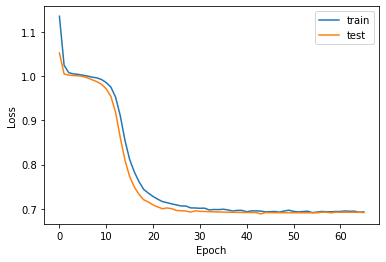

==============minmax===================
MAPE test is : 131.05619
MAPE test invert is : 76.51419
==============zscore===================
MAPE test is : 2035958.14377
MAPE test invert is : 47.01020
RMSE Testing is : 0.832
RMSE Testing invert is : 85.261
R2 test is : 0.30842


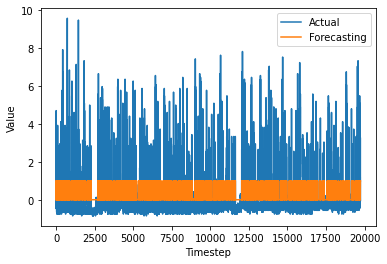

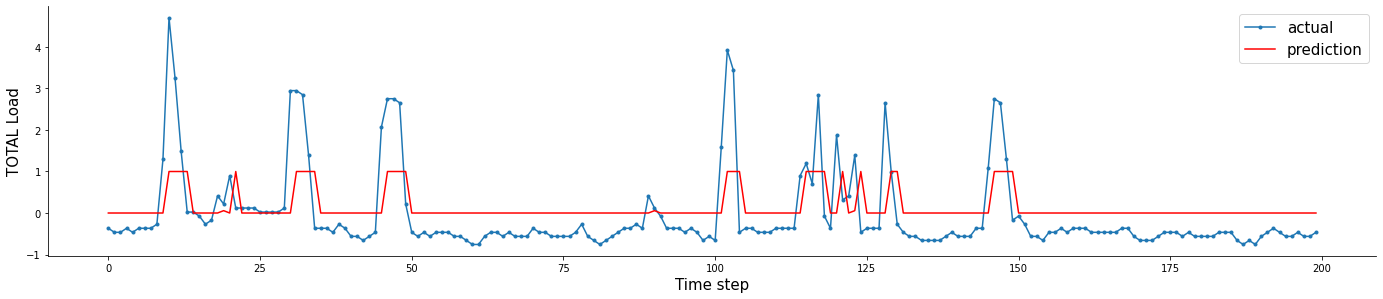

Epoch 1/66
198/198 [==============================] - 33s 39ms/step - loss: 1.1306 - val_loss: 1.0406
Epoch 2/66
198/198 [==============================] - 4s 22ms/step - loss: 1.0191 - val_loss: 1.0032
Epoch 3/66
198/198 [==============================] - 5s 26ms/step - loss: 1.0069 - val_loss: 1.0011
Epoch 4/66
198/198 [==============================] - 4s 22ms/step - loss: 1.0021 - val_loss: 1.0005
Epoch 5/66
198/198 [==============================] - 4s 22ms/step - loss: 1.0021 - val_loss: 0.9998
Epoch 6/66
198/198 [==============================] - 5s 26ms/step - loss: 1.0011 - val_loss: 0.9986
Epoch 7/66
198/198 [==============================] - 5s 25ms/step - loss: 0.9995 - val_loss: 0.9971
Epoch 8/66
198/198 [==============================] - 5s 26ms/step - loss: 0.9990 - val_loss: 0.9950
Epoch 9/66
198/198 [==============================] - 4s 22ms/step - loss: 0.9959 - val_loss: 0.9913
Epoch 10/66
198/198 [==============================] - 4s 22ms/step - loss: 0.9944 - val_l

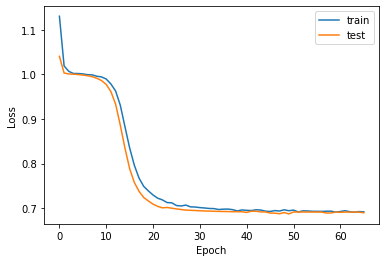

==============minmax===================
MAPE test is : 135.37407
MAPE test invert is : 76.81093
==============zscore===================
MAPE test is : 1993408.25643
MAPE test invert is : 46.84351
RMSE Testing is : 0.830
RMSE Testing invert is : 85.125
R2 test is : 0.31062


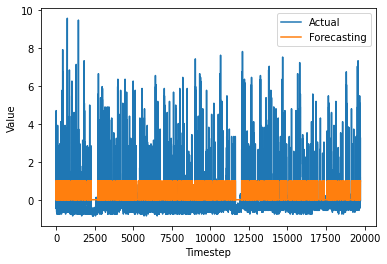

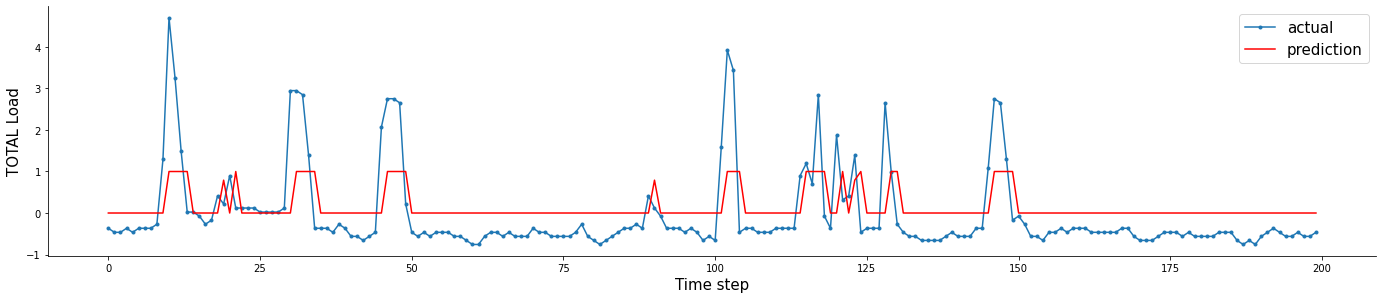

Epoch 1/66
198/198 [==============================] - 34s 40ms/step - loss: 1.1439 - val_loss: 1.0464
Epoch 2/66
198/198 [==============================] - 4s 21ms/step - loss: 1.0237 - val_loss: 1.0045
Epoch 3/66
198/198 [==============================] - 5s 26ms/step - loss: 1.0062 - val_loss: 1.0016
Epoch 4/66
198/198 [==============================] - 4s 21ms/step - loss: 1.0045 - val_loss: 1.0008
Epoch 5/66
198/198 [==============================] - 4s 21ms/step - loss: 1.0036 - val_loss: 1.0002
Epoch 6/66
198/198 [==============================] - 5s 26ms/step - loss: 1.0011 - val_loss: 0.9988
Epoch 7/66
198/198 [==============================] - 4s 21ms/step - loss: 1.0012 - val_loss: 0.9963
Epoch 8/66
198/198 [==============================] - 4s 21ms/step - loss: 0.9971 - val_loss: 0.9918
Epoch 9/66
198/198 [==============================] - 5s 25ms/step - loss: 0.9949 - val_loss: 0.9863
Epoch 10/66
198/198 [==============================] - 4s 21ms/step - loss: 0.9892 - val_l

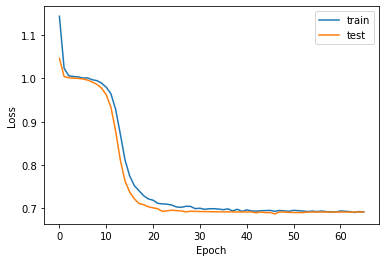

==============minmax===================
MAPE test is : 136.92398
MAPE test invert is : 76.98345
==============zscore===================
MAPE test is : 2438437.55652
MAPE test invert is : 46.88104
RMSE Testing is : 0.831
RMSE Testing invert is : 85.219
R2 test is : 0.30909


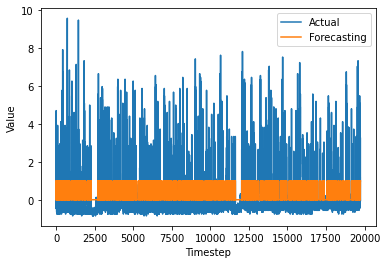

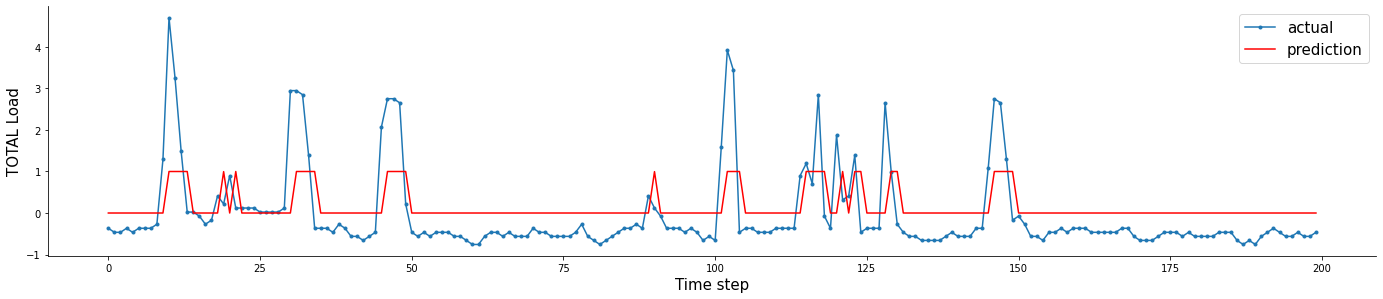

Epoch 1/66
198/198 [==============================] - 36s 42ms/step - loss: 1.1161 - val_loss: 1.0368
Epoch 2/66
198/198 [==============================] - 5s 25ms/step - loss: 1.0194 - val_loss: 1.0029
Epoch 3/66
198/198 [==============================] - 6s 29ms/step - loss: 1.0045 - val_loss: 1.0009
Epoch 4/66
198/198 [==============================] - 5s 25ms/step - loss: 1.0026 - val_loss: 0.9999
Epoch 5/66
198/198 [==============================] - 5s 24ms/step - loss: 1.0013 - val_loss: 0.9990
Epoch 6/66
198/198 [==============================] - 6s 29ms/step - loss: 1.0010 - val_loss: 0.9981
Epoch 7/66
198/198 [==============================] - 5s 24ms/step - loss: 0.9999 - val_loss: 0.9967
Epoch 8/66
198/198 [==============================] - 6s 28ms/step - loss: 0.9987 - val_loss: 0.9943
Epoch 9/66
198/198 [==============================] - 5s 24ms/step - loss: 0.9965 - val_loss: 0.9908
Epoch 10/66
198/198 [==============================] - 5s 28ms/step - loss: 0.9947 - val_l

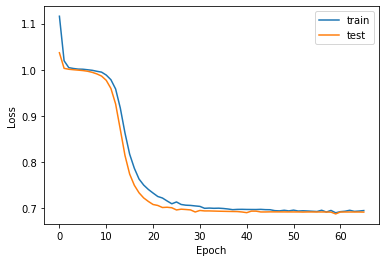

==============minmax===================
MAPE test is : 136.75710
MAPE test invert is : 76.96491
==============zscore===================
MAPE test is : 2456173.62934
MAPE test invert is : 46.87804
RMSE Testing is : 0.831
RMSE Testing invert is : 85.208
R2 test is : 0.30927


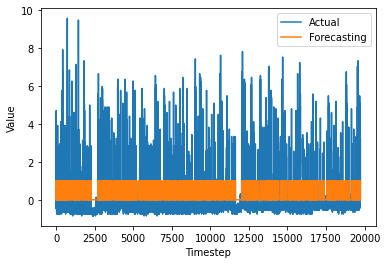

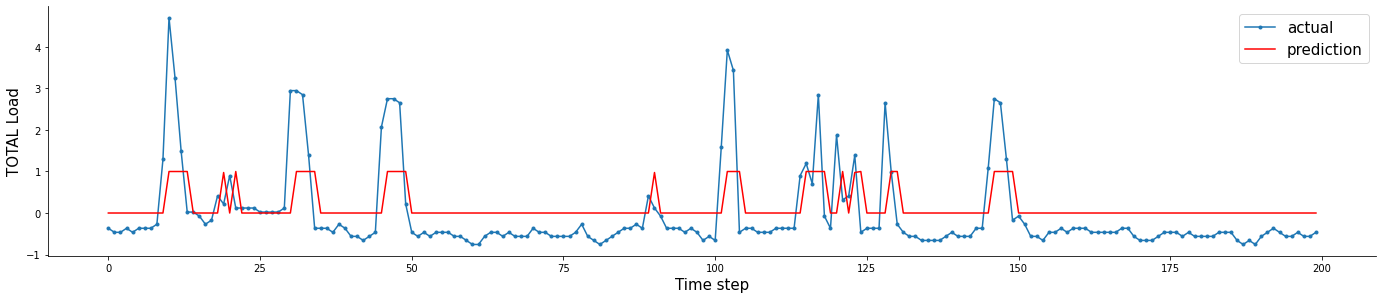

Epoch 1/66
198/198 [==============================] - 39s 45ms/step - loss: 1.1348 - val_loss: 1.0407
Epoch 2/66
198/198 [==============================] - 5s 26ms/step - loss: 1.0228 - val_loss: 1.0047
Epoch 3/66
198/198 [==============================] - 6s 28ms/step - loss: 1.0071 - val_loss: 1.0020
Epoch 4/66
198/198 [==============================] - 5s 26ms/step - loss: 1.0043 - val_loss: 1.0010
Epoch 5/66
198/198 [==============================] - 6s 29ms/step - loss: 1.0025 - val_loss: 1.0004
Epoch 6/66
198/198 [==============================] - 6s 31ms/step - loss: 1.0013 - val_loss: 0.9999
Epoch 7/66
198/198 [==============================] - 5s 26ms/step - loss: 1.0018 - val_loss: 0.9996
Epoch 8/66
198/198 [==============================] - 6s 28ms/step - loss: 1.0005 - val_loss: 0.9988
Epoch 9/66
198/198 [==============================] - 5s 25ms/step - loss: 0.9996 - val_loss: 0.9974
Epoch 10/66
198/198 [==============================] - 6s 29ms/step - loss: 0.9990 - val_l

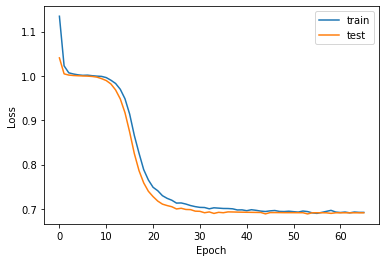

==============minmax===================
MAPE test is : 136.92770
MAPE test invert is : 76.98570
==============zscore===================
MAPE test is : 1554212.27264
MAPE test invert is : 46.88329
RMSE Testing is : 0.831
RMSE Testing invert is : 85.225
R2 test is : 0.30900


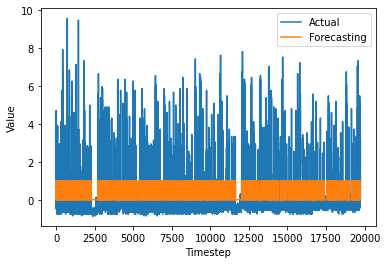

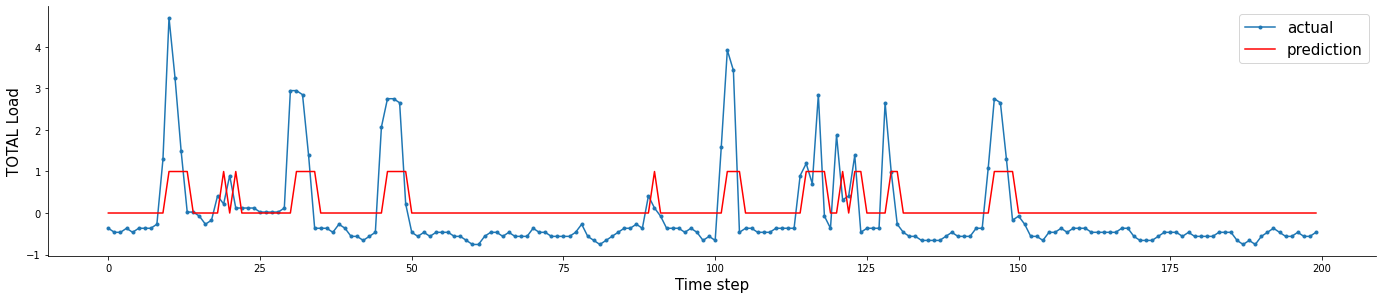

,0,1,2,3,4,nama
0,"131,0561945467235","135,37406643157667","136,92398272796942","136,75710062474414","136,92769851775267",mminmax
1,"76,5141917085233","76,81092976810918","76,98344786860025","76,9649106189351","76,98569563759614",minmax invert
2,"2035958,1437704382","1993408,2564327943","2438437,556524131","2456173,6293432596","1554212,272643127",zscore
3,"47,01020428390795","46,84350512577314","46,88104276339893","46,87803841691897","46,883285362998144",zscpre invert
4,0.8316321994841753,0.8303054110622201,0.8312284544153699,0.8311202461673746,0.8312807628241553,rmse
5,"85,2608399945077","85,12481460320967","85,21944712428052","85,20835336657832","85,22480990229054",rmse invert
6,"0,3084181921329483","0,3106231350849007","0,30908953450167664","0,30926940645955303","0,309002575100774",r2
7,349,332,331,410,412,waktu


In [22]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto8
import shutil

mapem = []
mapemi = []
mapez = []
mapezi = []
r = []
ri = []
r2 = []
w = []

datat = []

for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


  #design network LSTM
  model = Sequential()
  model.add(GRU(11, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'sigmoid'))
  model.add(Dropout(0.2))

  model.add(GRU(units = 11, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(GRU(units = 11, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(GRU(units = 11, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(GRU(units = 11, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(GRU(units = 11, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(GRU(units = 11, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(GRU(units = 11, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='mse', optimizer='adam')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=66, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))
  waktu = end-start

  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto8") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  mapemin = (mape(test_y, yhat))*100
  print(f'MAPE test is : %.5f' % mapemin)
  mapemini = (mape(inv_y, inv_yhat))*100
  print(f'MAPE test invert is : %.5f' % mapemini)

  print('==============zscore===================')
  mapezs = (mape(yhat, test_y))*100
  print(f'MAPE test is : %.5f' % mapezs)
  mapezsi = (mape(inv_yhat, inv_y))*100
  print(f'MAPE test invert is : %.5f' % mapezsi)

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  rs = r2_score(test_y, yhat)
  print(f'R2 test is : %.5f' % rs)
  # print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')

  mapem.append(str(mapemin).replace('.', ','))
  mapemi.append(str(mapemini).replace('.', ','))
  mapez.append(str(mapezs).replace('.', ','))
  mapezi.append(str(mapezsi).replace('.', ','))
  r.append(str(rmsetest))
  ri.append(str(rmsetestinvert).replace('.', ','))
  r2.append(str(rs).replace('.', ','))
  w.append(str(round(waktu)))



  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto8")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto8")

datat.append(mapem)
datat.append(mapemi)
datat.append(mapez)
datat.append(mapezi)
datat.append(r)
datat.append(ri)
datat.append(r2)
datat.append(w)
  
# Create the pandas DataFrame
dc = pd.DataFrame(datat)

nama = ['mminmax', 'minmax invert', 'zscore', 'zscpre invert', 'rmse', ' rmse invert', 'r2', 'waktu']
dc['nama'] = nama
# print dataframe.
dc